# BANK MARKETING CAMPAIGN

**Problem Statement**:

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

About Dataset
It is a dataset that describing Portugal bank marketing campaigns results.Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Source of the data: https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Objective:**

This project aims to analyze the bank's last marketing campaign to figure out what worked and what didn't. By studying the data, we want to understand why some customers deposited money and others didn't. Using this information, we'll develop strategies to make future campaigns more effective. The goal is to help the bank attract more customers and encourage them to deposit money, ultimately improving their overall success.
- Dataset - UCI Machine Learning Repository.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### <font color= indigo> Columns Description
<table>
    <tr>
        <td><b>Feature</b></td>
        <td><b>Defination</b></td>
        <td><b>Type</b></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Customer's age</td>
        <td>Numeric: '59','34','32'</td>
    </tr>
    <tr>
        <td>Job</td>
        <td>Customer's job</td>
        <td>Categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired'..)</td>
    </tr>
    <tr>
        <td>Marital</td>
        <td>Customer's marital status</td>
        <td>Categorical: 'divorced','married','single','unknown'</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>Customer education level</td>
        <td>Categorical: 'primary', 'secondary', 'tertiary' ve 'unknown'</td>
    </tr>
    <tr>
        <td>Default</td>
        <td>Does the customer already have a loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Housing</td>
        <td>Does the client have a home loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Loan</td>
        <td>Does the customer have a personal loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Balance</td>
        <td>Customer's individual balance</td>
        <td>Numeric: '1270','2343','45'</td>
    </tr>
    <tr>
        <td>Contact</td>
        <td>Customer's contact type</td>
        <td>Categorical: 'cellular','telephone','unknown'</td>
    </tr>
    <tr>
        <td>Month</td>
        <td>Last contact month of the year</td>
        <td>Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'</td>
    </tr>
    <tr>
        <td>Day</td>
        <td>Last contact day of the week</td>
        <td></td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>Last contact time, in seconds</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Campaign</td>
        <td>Number of contacts performed during this campaign and for this customer</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Pdays</td>
        <td>Number of days since the customer was last contacted from a previous campaign</td>
        <td>Numeric (probably -1 means the customer has not been contacted before)</td>
    </tr>
    <tr>
        <td>Previous</td>
        <td>Number of contacts performed before this campaign and for this customer</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Poutcome</td>
        <td>Result of previous marketing campaign</td>
        <td>Categorical: 'failure','nonexistent','success','other'</td>
    </tr>
    <tr>
        <td>Deposit&nbsp;</td>
        <td>Has the customer subscribed to a time deposit?</td>
        <td>Binary: 'yes','no'</td>
    </tr>
</table>

These columns provide valuable information about the customers and their interactions with the bank, which can be used for analysis and modeling to predict deposit outcomes and improve marketing strategies.

# <font color= indigo> BASIC INFORMATION ABOUT DATA

In [3]:
df.shape

(11162, 17)

In [4]:
counts = df['deposit'].value_counts(normalize=True)
print(counts, "\n ")

df['deposit'].value_counts()   # not imbalance data

no     0.52616
yes    0.47384
Name: deposit, dtype: float64 
 


no     5873
yes    5289
Name: deposit, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

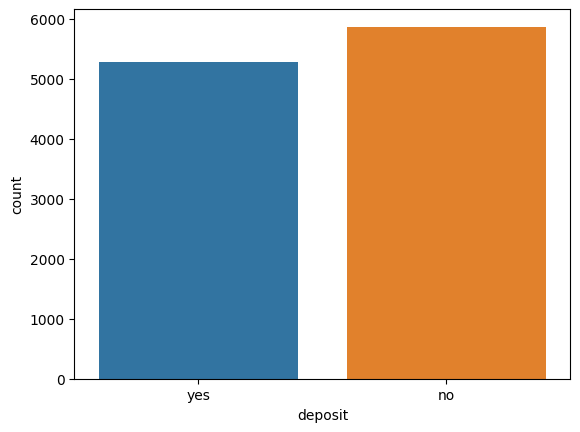

In [5]:
sns.countplot(data=df, x='deposit')

In [6]:
data = df.copy()

In [7]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

- Age : The median age (39 years) is lower than the mean, suggesting a slightly right-skewed distribution of ages.
- Balance : The 'balance' variable in the dataset exhibits a high standard deviation, indicating significant variability in account balances among customers. The mean, median, and minimum-maximum values are notably different from each other, suggesting potential skewness or non-normality in the distribution of account balances. This discrepancy could indicate the presence of outliers or asymmetry in the data distribution. To address this, scaling the data using a min-max scale

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# DATA CLEANING : 
   - Missing values
   - Duplicated Values

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no missing value in the data set. If there were missing values, we would have to fill them with the median, mean or mode (in some cases the data could be deleted) according to the data set.

In [10]:
df.duplicated().sum()

0

# EDA ( UNIVARIATE ANALYSIS )

**Distribution of Numeric Variables**

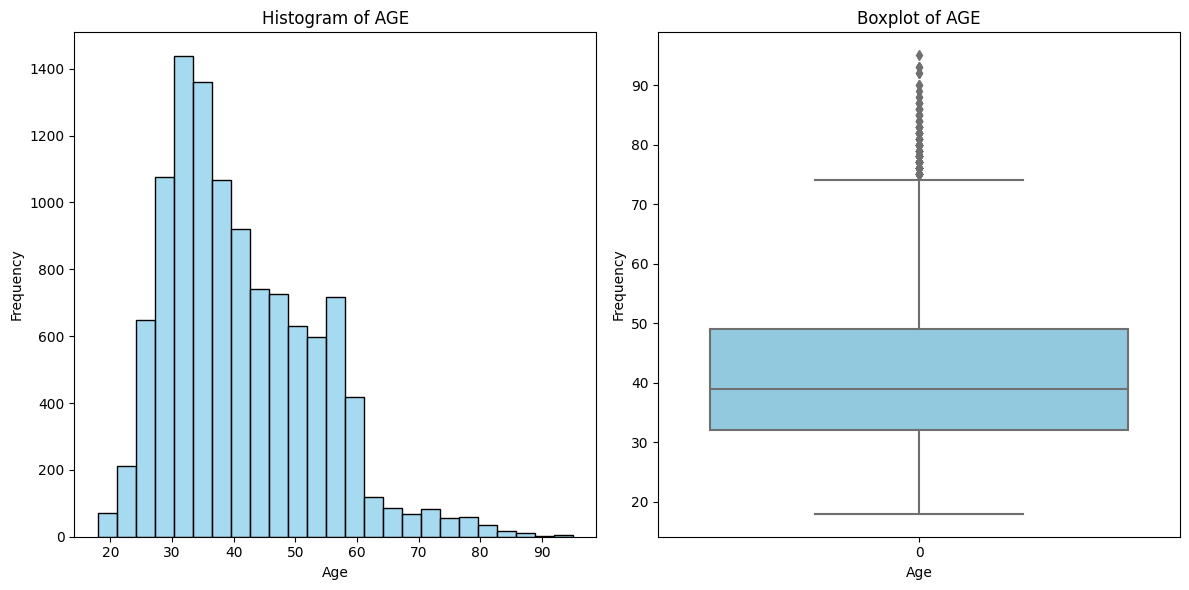

In [11]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['age'], kde=False, bins=25, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of AGE')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['age'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of AGE')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

- The bank’s customers are primarily aged between 20-60 years, with a concentration around 30-40 years. This could indicate that the bank's marketing campaigns are more effective or more appealing to this age group.
The middle 50% of ages fall between 30 and 50 years.
- Since there is a decline in frequency after the age of 60, the bank could consider targeted campaigns to attract older customers if they wish to diversify their customer base.  By understanding the preferences and needs of older customers, the bank can create specific marketing strategies to engage this segment.
- The presence of outliers in the higher age ranges might warrant further investigation.
- The right skewness indicates that there are relatively few very old customers compared to younger ones. 
- The median age is approximately 40 years.
- The middle 50% of ages fall between 30 and 50 years.

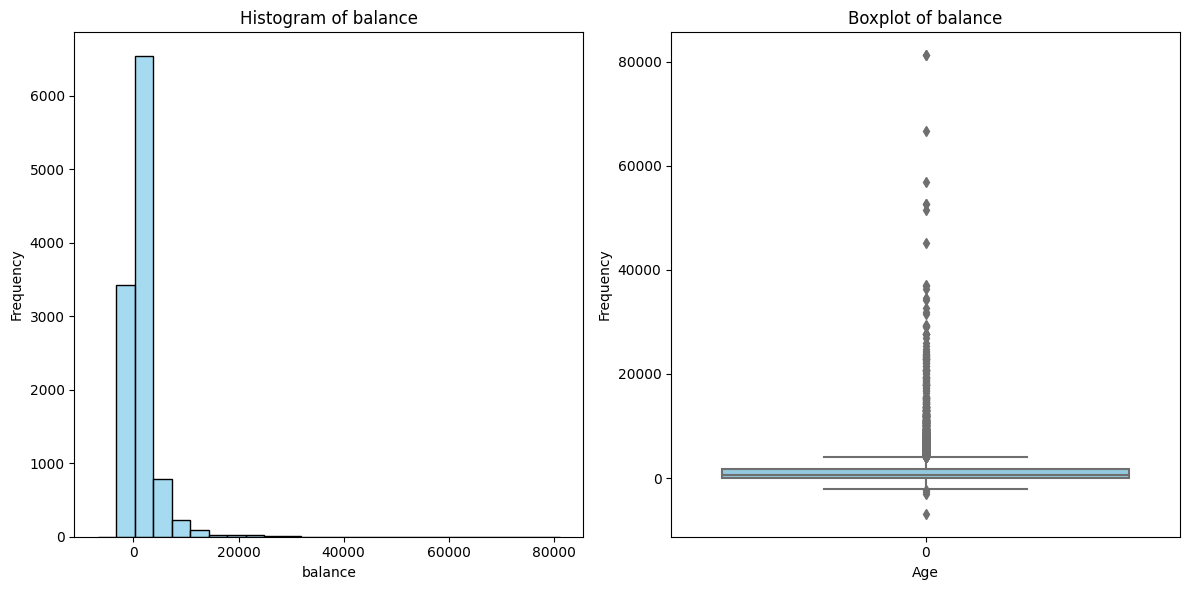

In [12]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['balance'], kde=False, bins=25, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of balance')
axs[0].set_xlabel('balance')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['balance'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of balance')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**INSIGHTS**
- Most individuals have low balances, as indicated by the high frequency near zero.
- The frequency decreases as balance amounts increase, suggesting that higher balances are less common.
- The median balance is near the lower end of the scale ,suggesting that a significant proportion of individuals have balances below this value.
- Some outliers have significantly higher balances than the majority of the dataset.

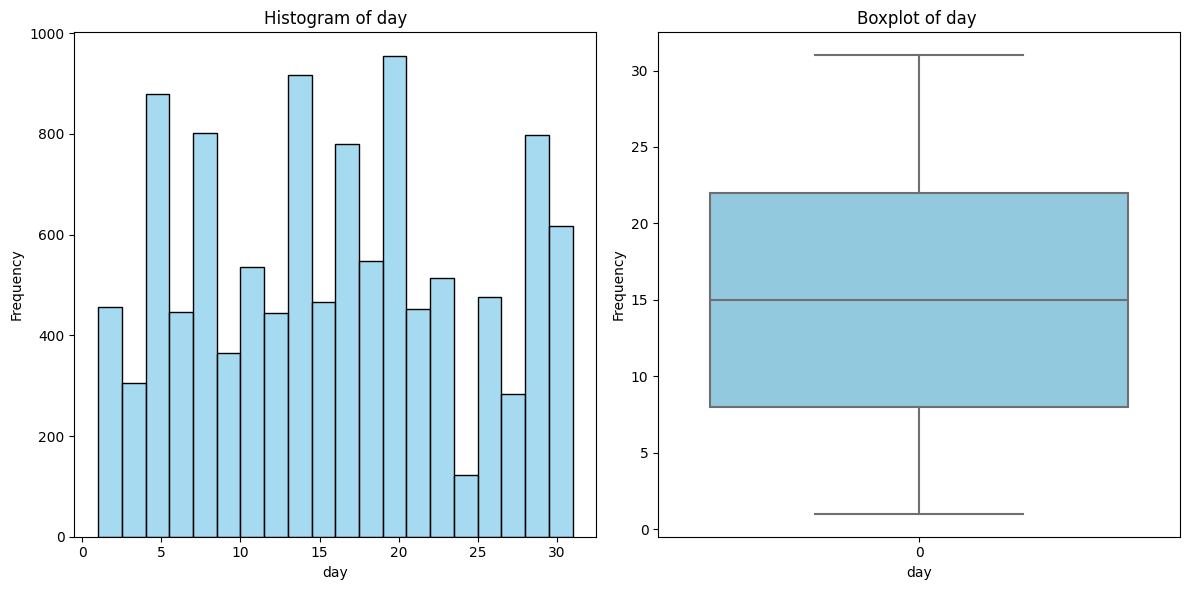

In [13]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['day'], kde=False, bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of day')
axs[0].set_xlabel('day')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['day'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of day ')
axs[1].set_xlabel('day')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**INSIGHTS**
- The observed pattern in the histogram indicates that days with frequencies around 10 to 20 are more common, while days with significantly lower or higher frequencies are less frequent. This distribution suggests a concentration of occurrences within a specific range of frequencies.

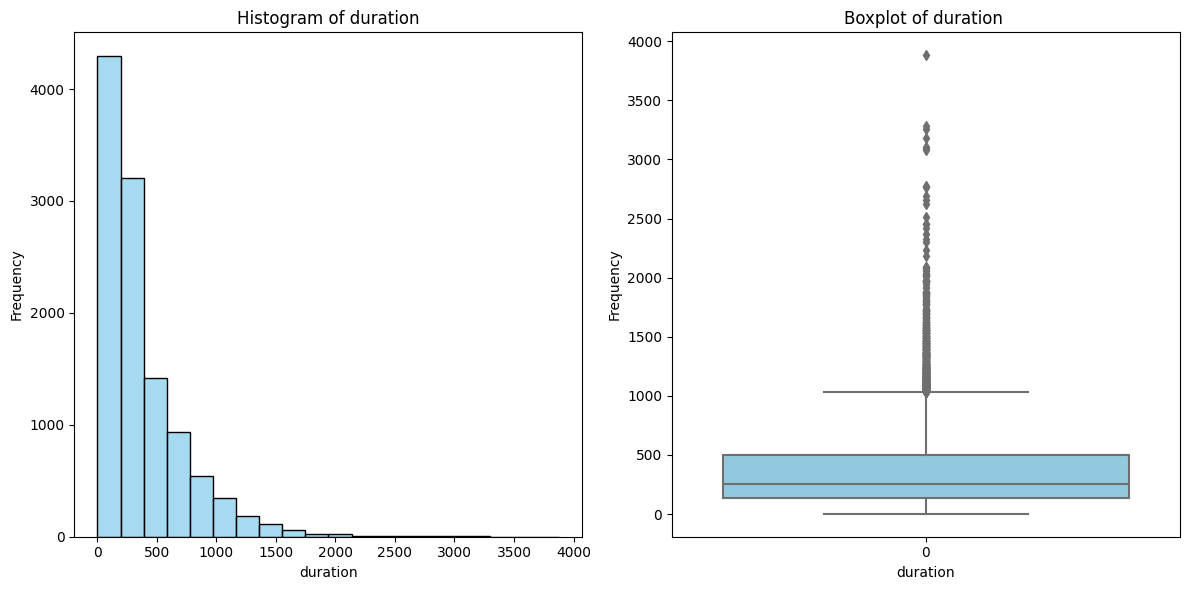

In [14]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['duration'], kde=False, bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of duration')
axs[0].set_xlabel('duration')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['duration'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of duration ')
axs[1].set_xlabel('duration')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**INSIGHTS**
- The majority of values are concentrated in the first bin (0-500), indicating a high frequency of lower duration values.
- The median appears closer to the first quartile (Q1) than the third quartile (Q3), confirming the right-skewed distribution.

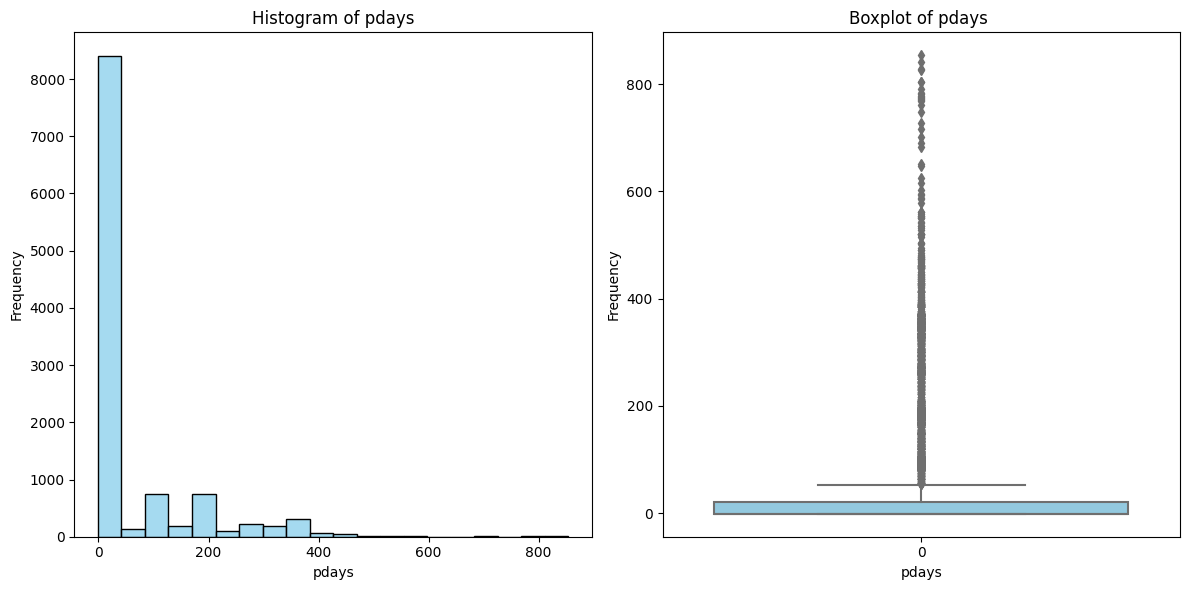

In [15]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['pdays'], kde= False, bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of pdays')
axs[0].set_xlabel('pdays')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['pdays'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of pdays ')
axs[1].set_xlabel('pdays')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**INSIGHTS**
- The upper outliers suggest there are a few customers who were contacted a long time ago, leading to the large disparity between these values and the rest of the data.

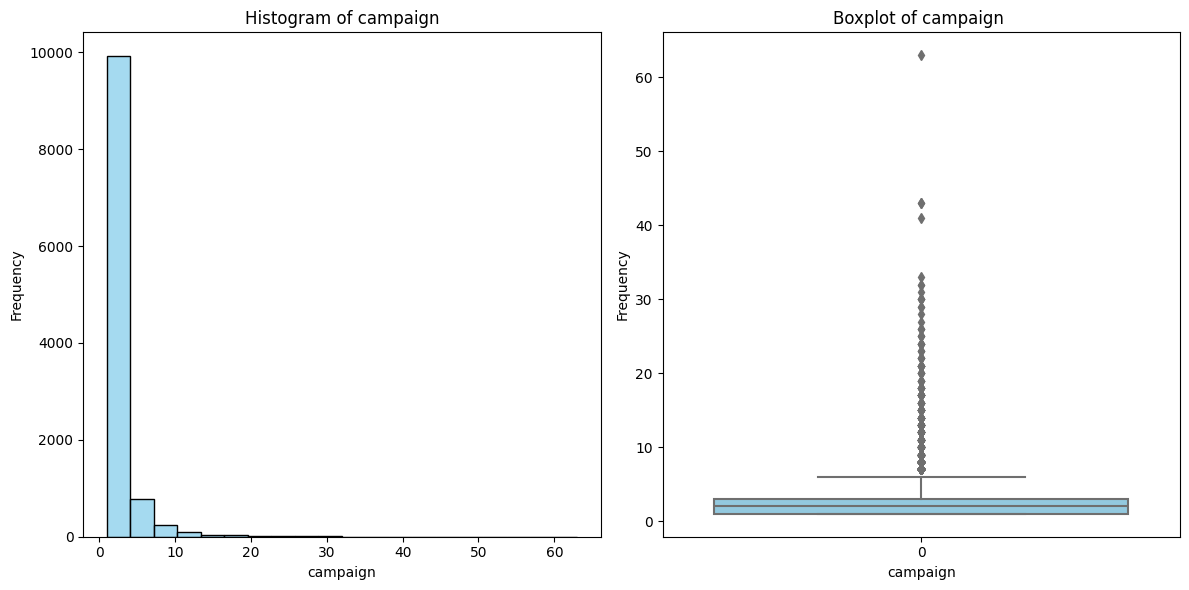

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['campaign'], kde=False, bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of campaign')
axs[0].set_xlabel('campaign')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['campaign'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of campaign ')
axs[1].set_xlabel('campaign')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

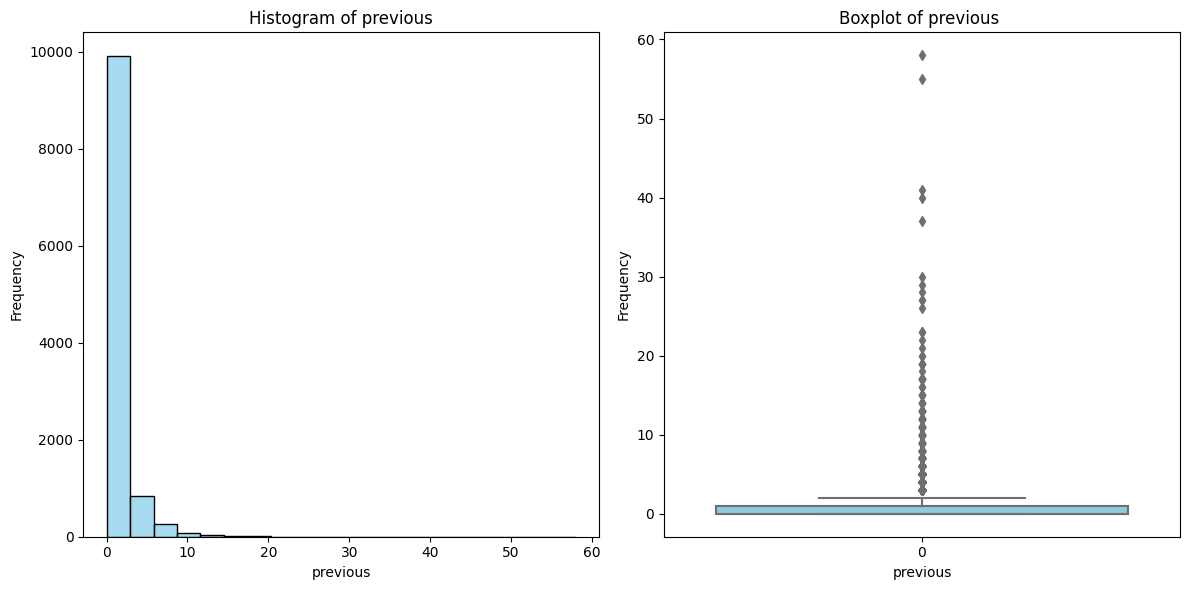

In [17]:
#  Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
sns.histplot(df['previous'], kde=False, bins=20, color='skyblue', ax=axs[0])
axs[0].set_title('Histogram of previous')
axs[0].set_xlabel('previous')
axs[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(df['previous'], color='skyblue', ax=axs[1])
axs[1].set_title('Boxplot of previous ')
axs[1].set_xlabel('previous')
axs[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**INSIGHTS**
- The histogram and boxplot of the "previous" variable show a highly right-skewed distribution, with most values clustered around 0-2. The majority of data points have low "previous" values, while a small number have much higher values, as indicated by numerous outliers. The central tendency is low, and the spread is small, with significant outliers extending far beyond the interquartile range. This suggests that while most values are low, there are some exceptionally high values.

**CATEGORICAL( UNIVARIATE )**

**JOB**

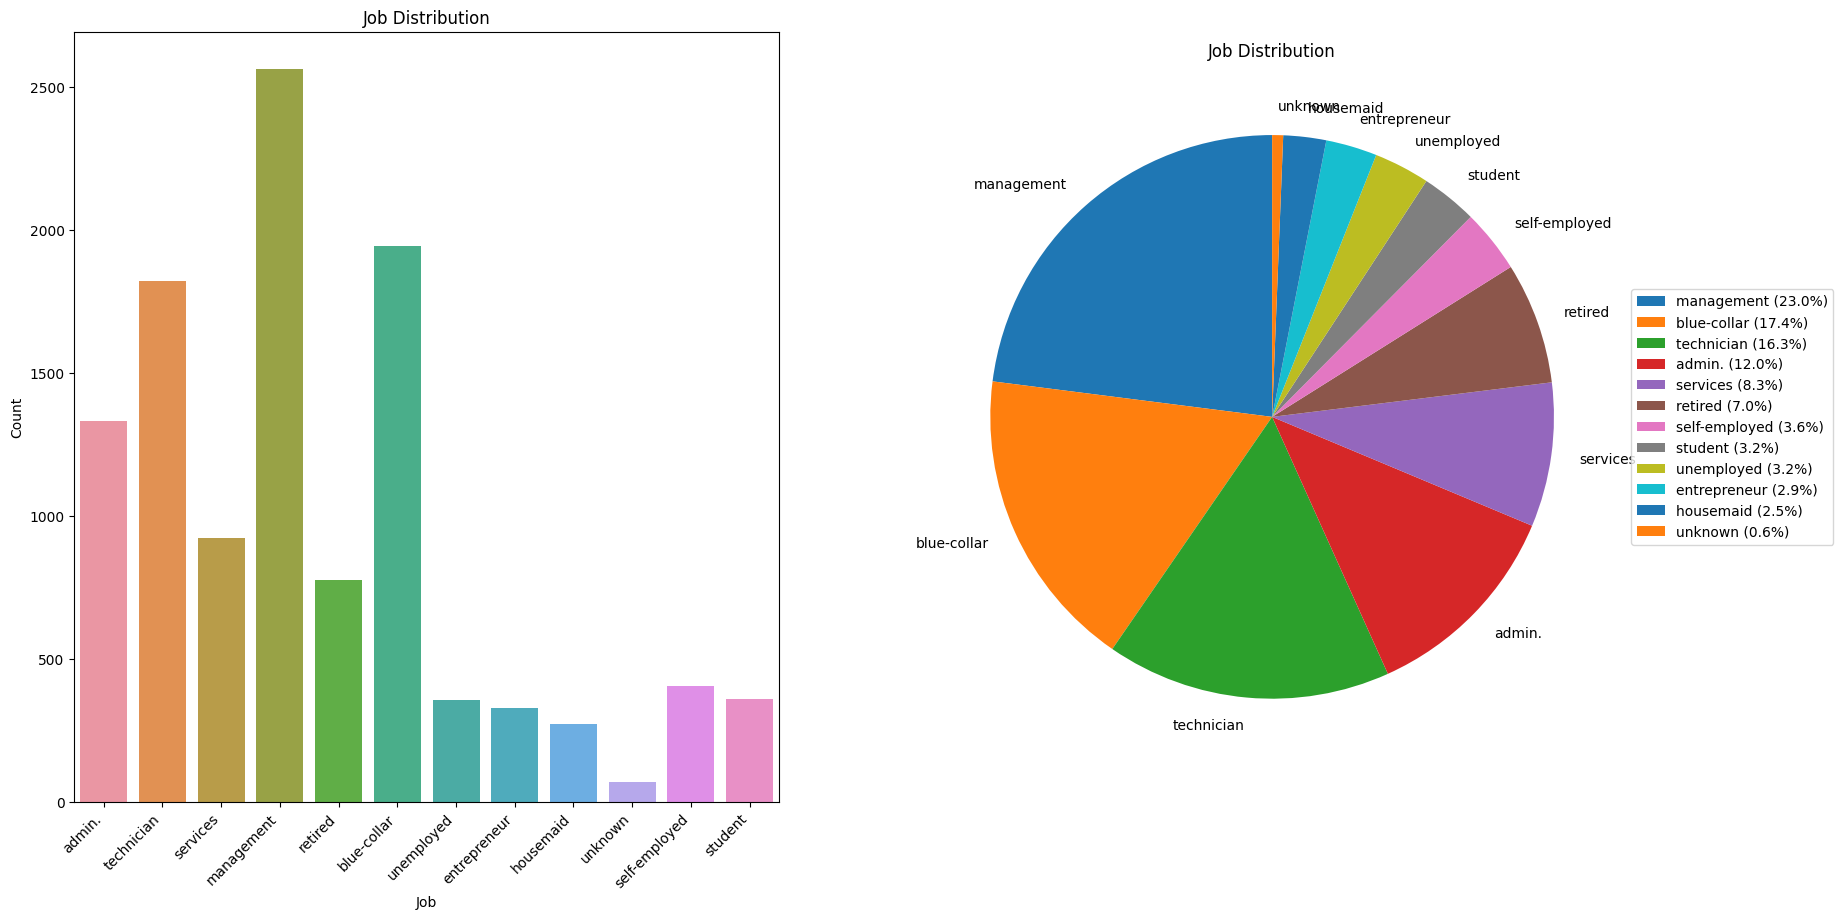

In [18]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='job')
plt.xticks(rotation=45, ha='right')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['job'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Job Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**MARITAL**

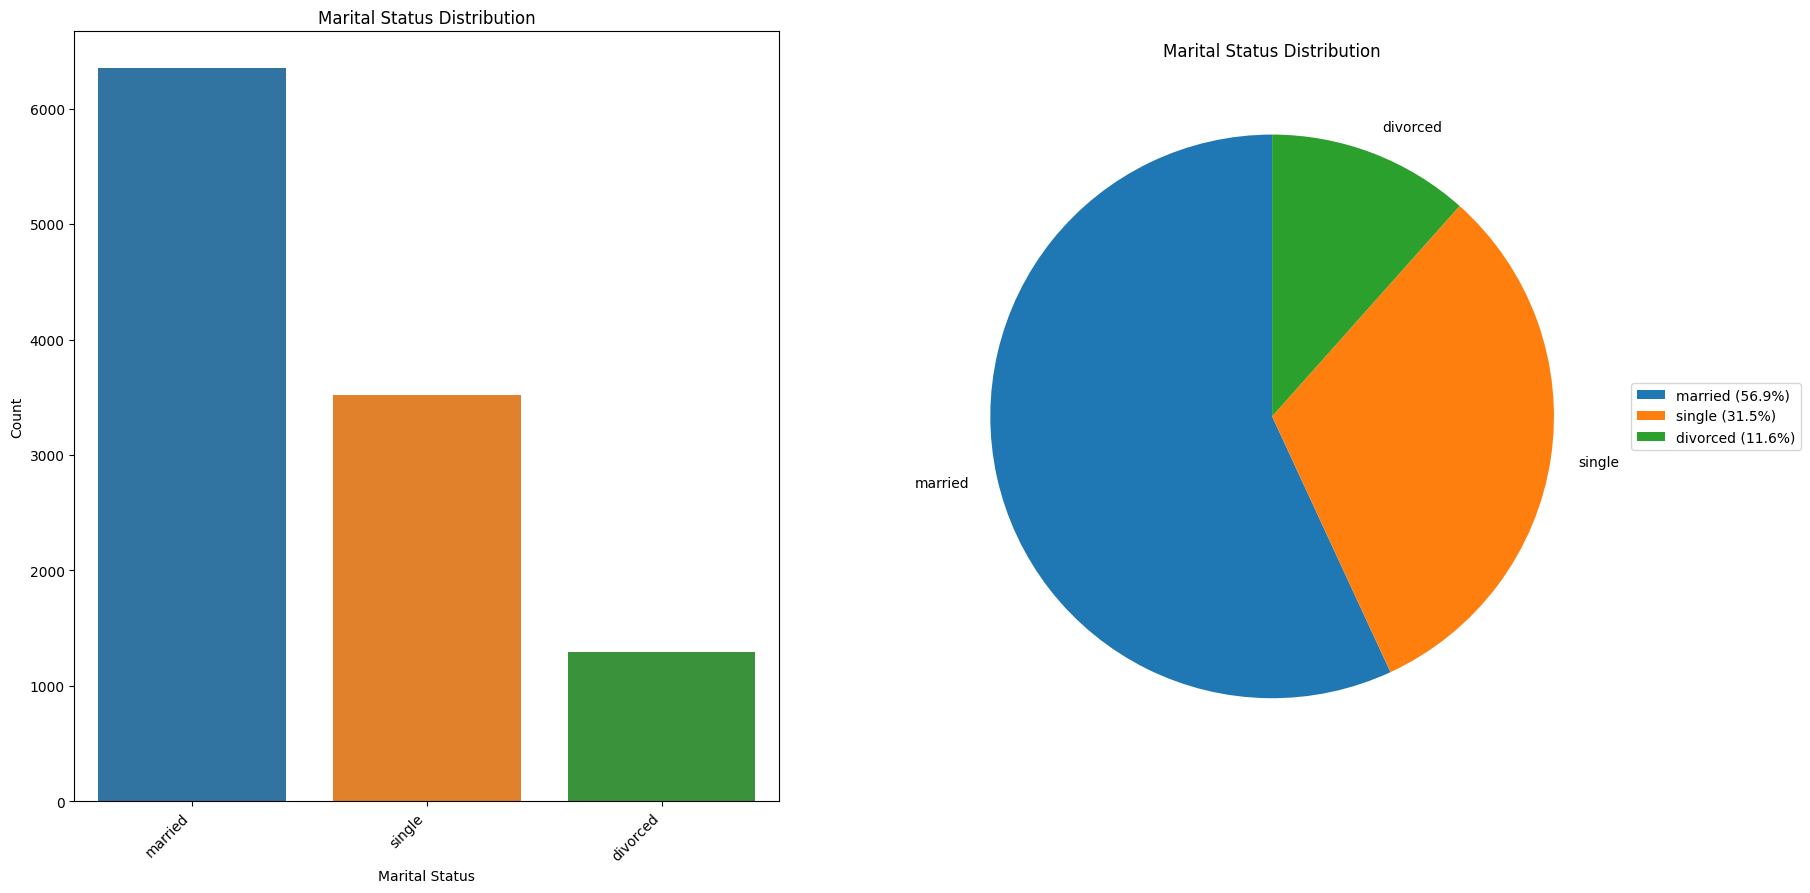

In [19]:
# Set up the figure and font size
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='marital')
plt.xticks(rotation=45, ha='right')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['marital'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Marital Status Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**EDUCATION**

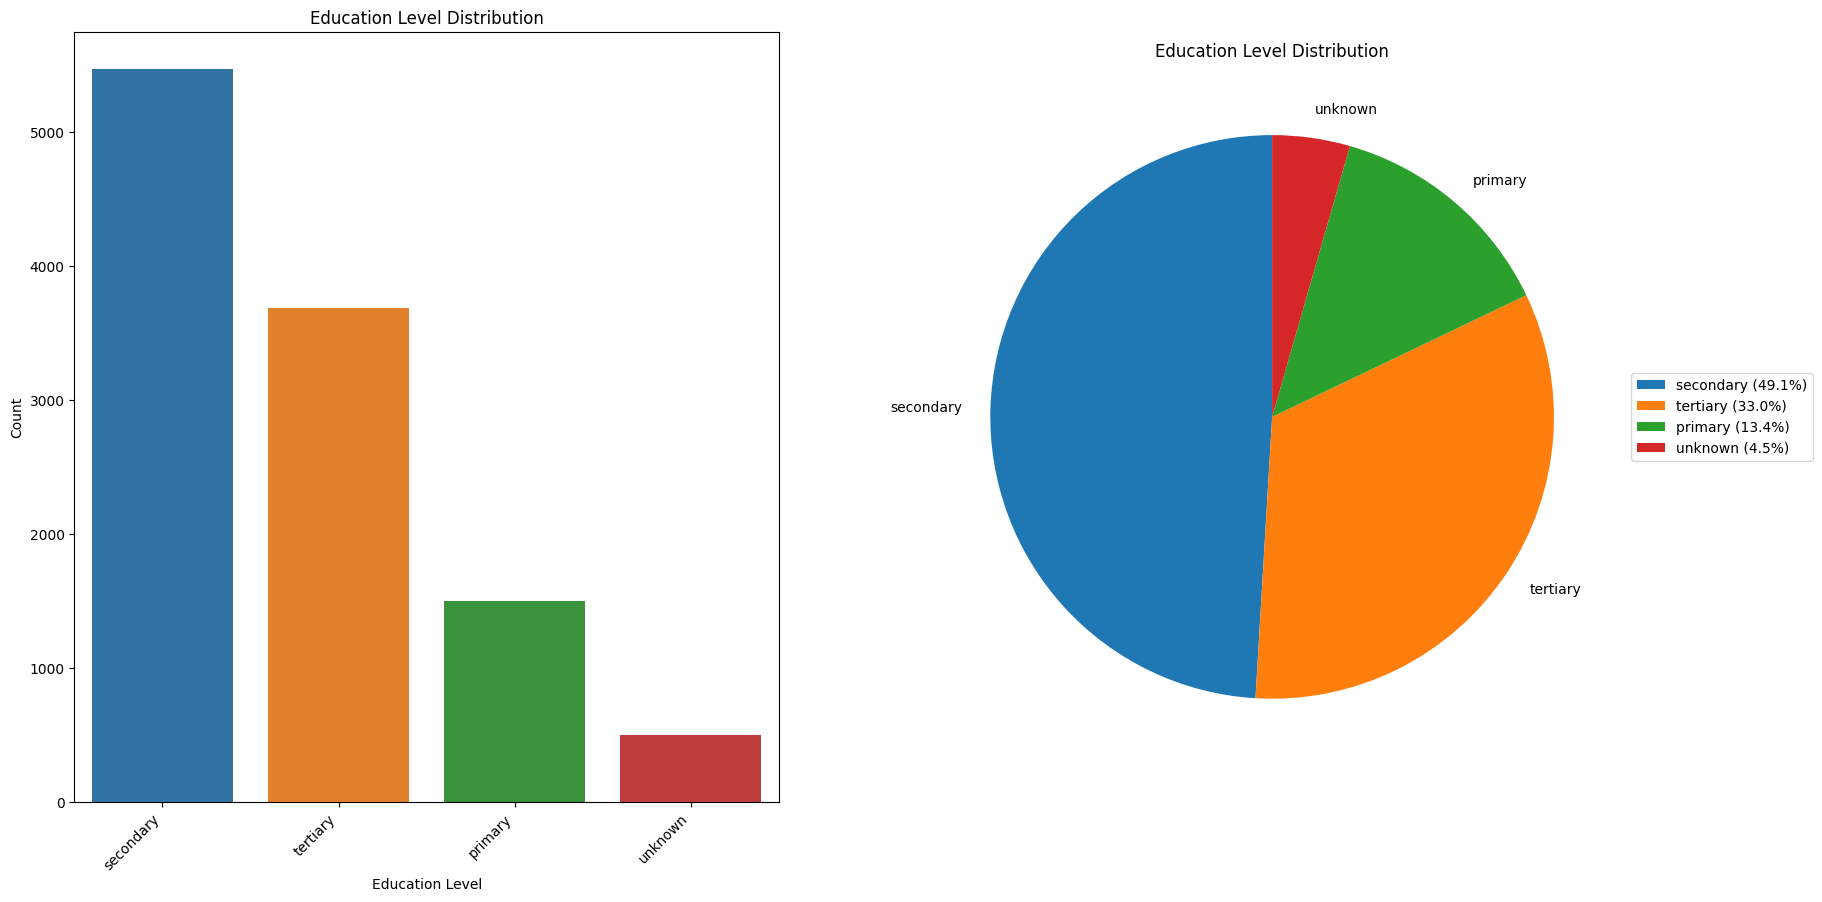

In [20]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='education')
plt.xticks(rotation=45, ha='right')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['education'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Education Level Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**DEFAULT**

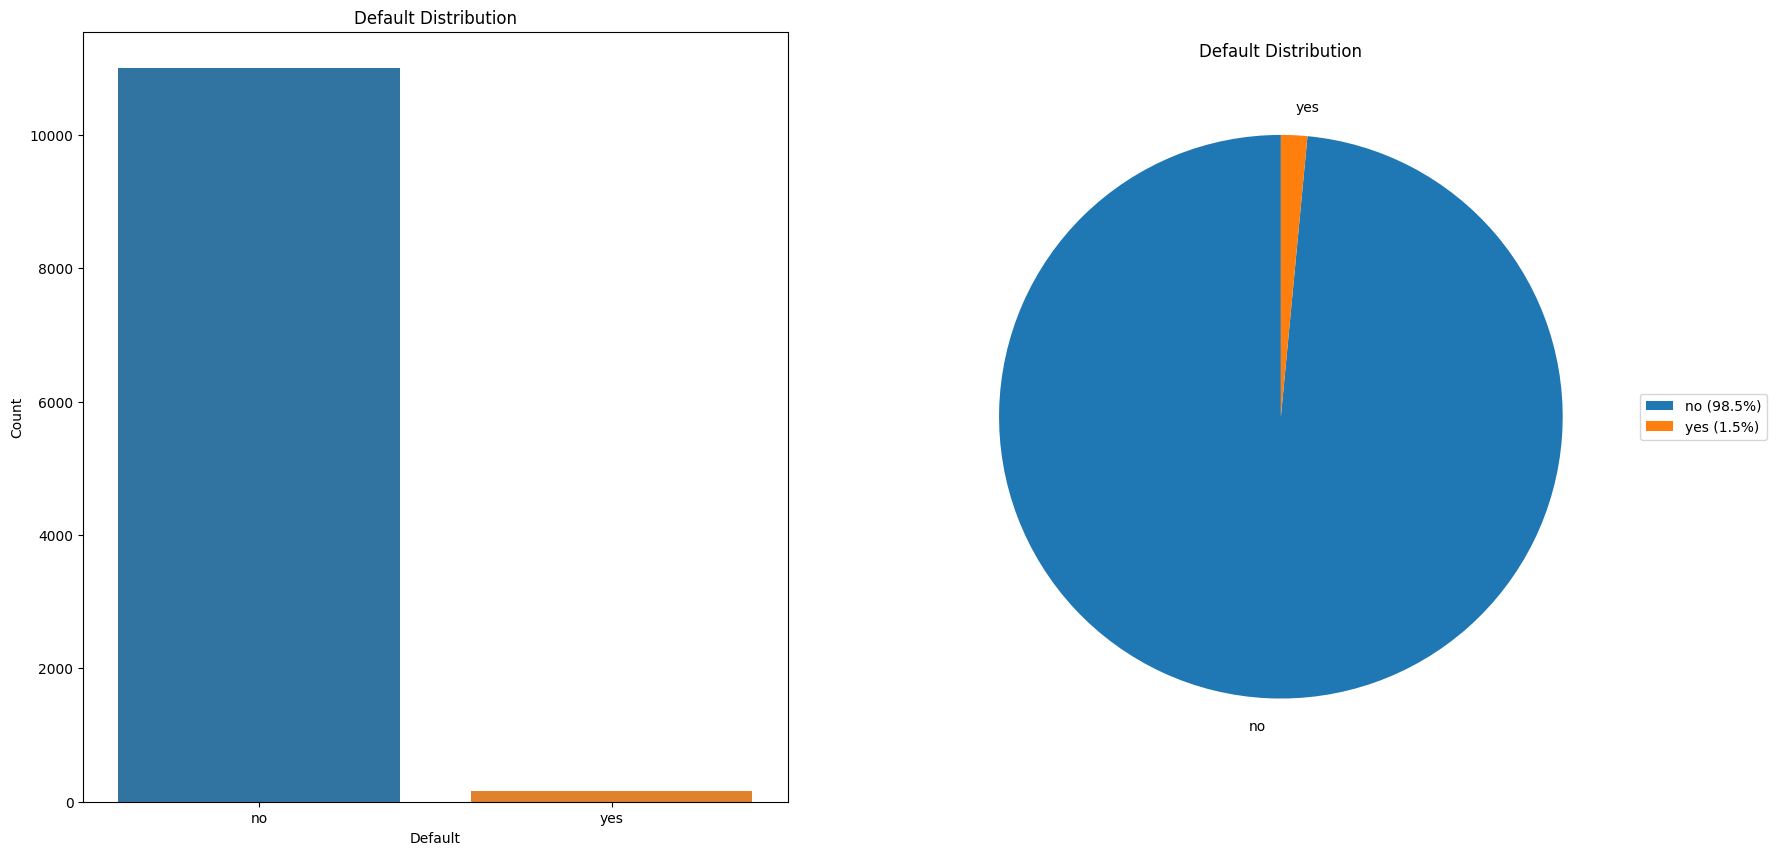

In [21]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='default')
plt.title('Default Distribution')
plt.xlabel('Default')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['default'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Default Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Housing Loan**

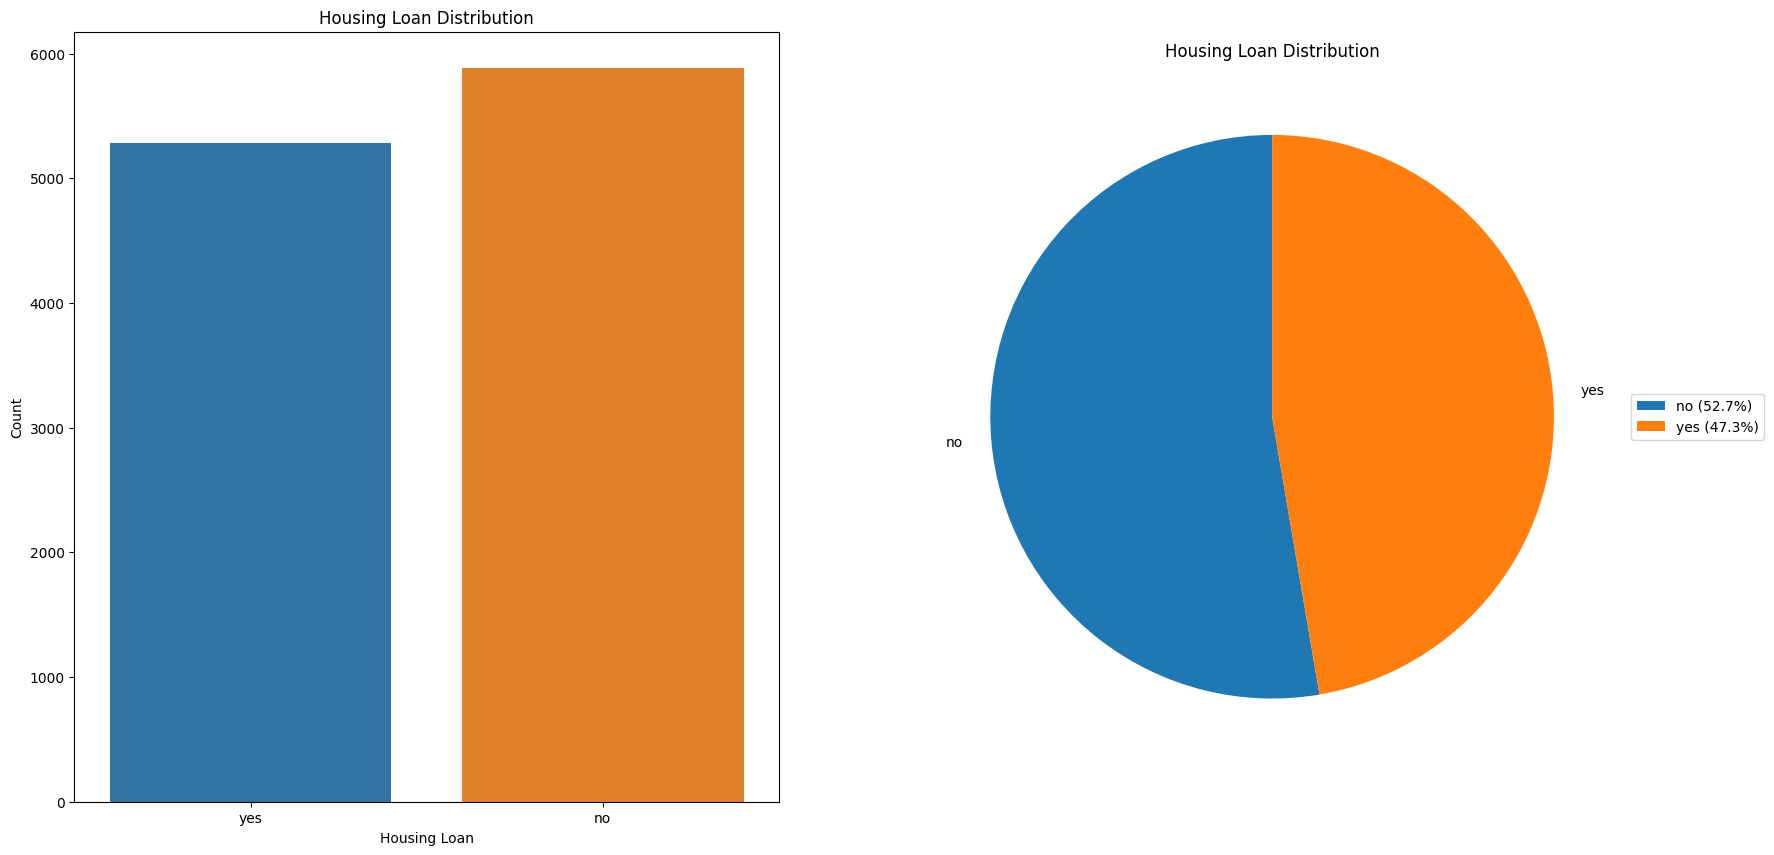

In [22]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='housing')
plt.title('Housing Loan Distribution')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['housing'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Housing Loan Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Loan**

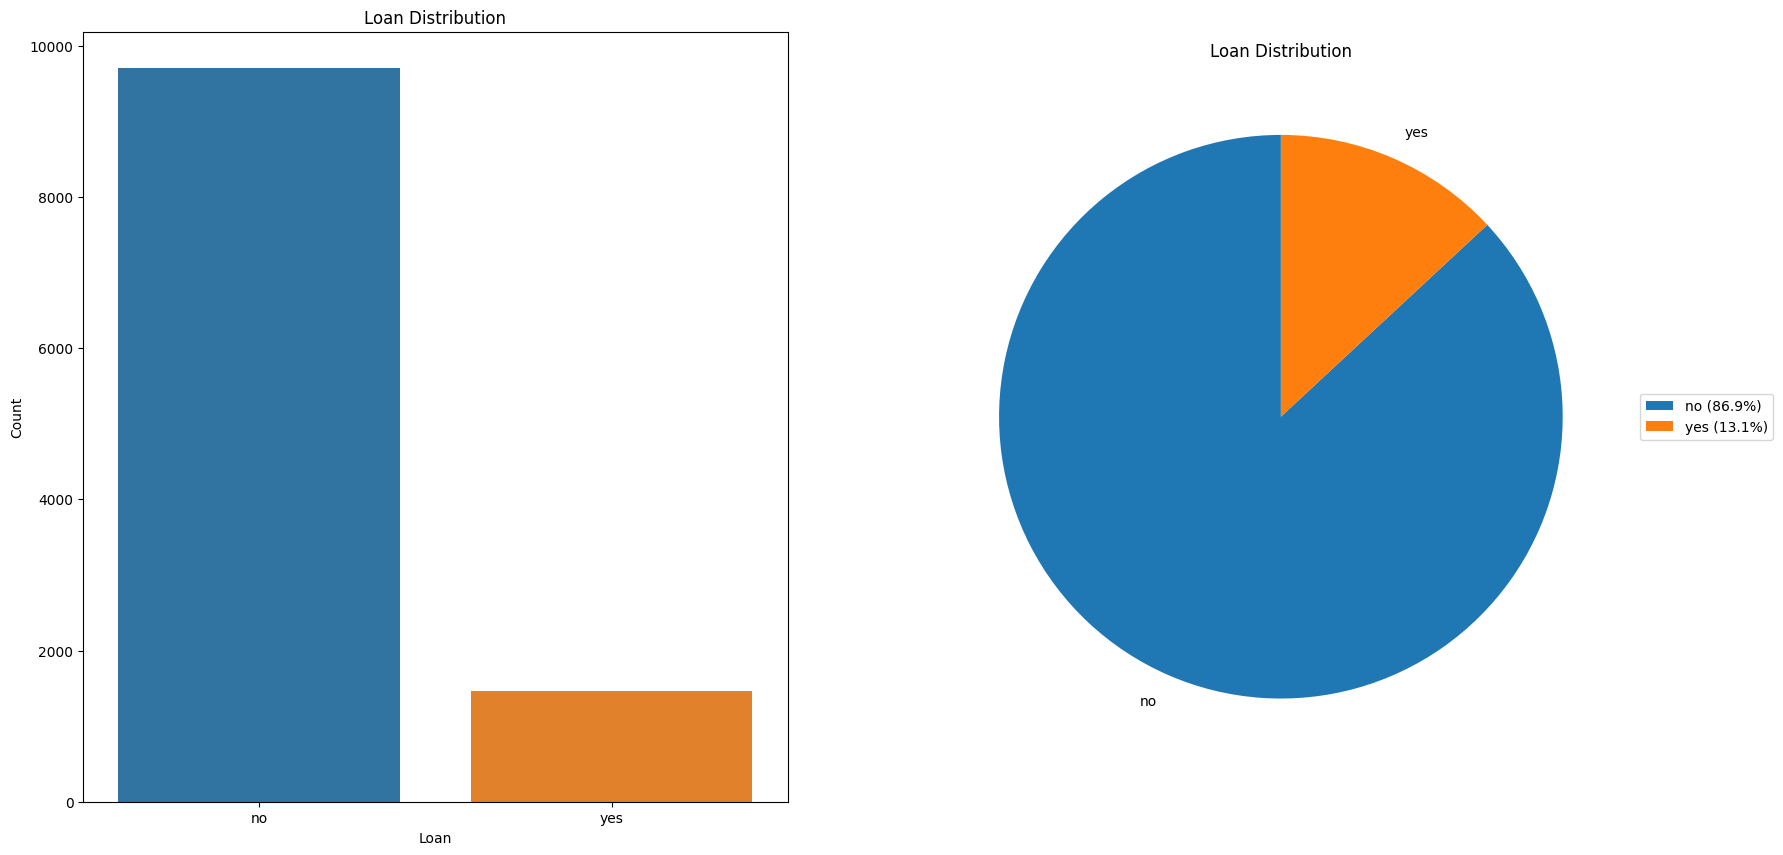

In [23]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='loan')
plt.title('Loan Distribution')
plt.xlabel('Loan')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['loan'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Loan Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Contact**

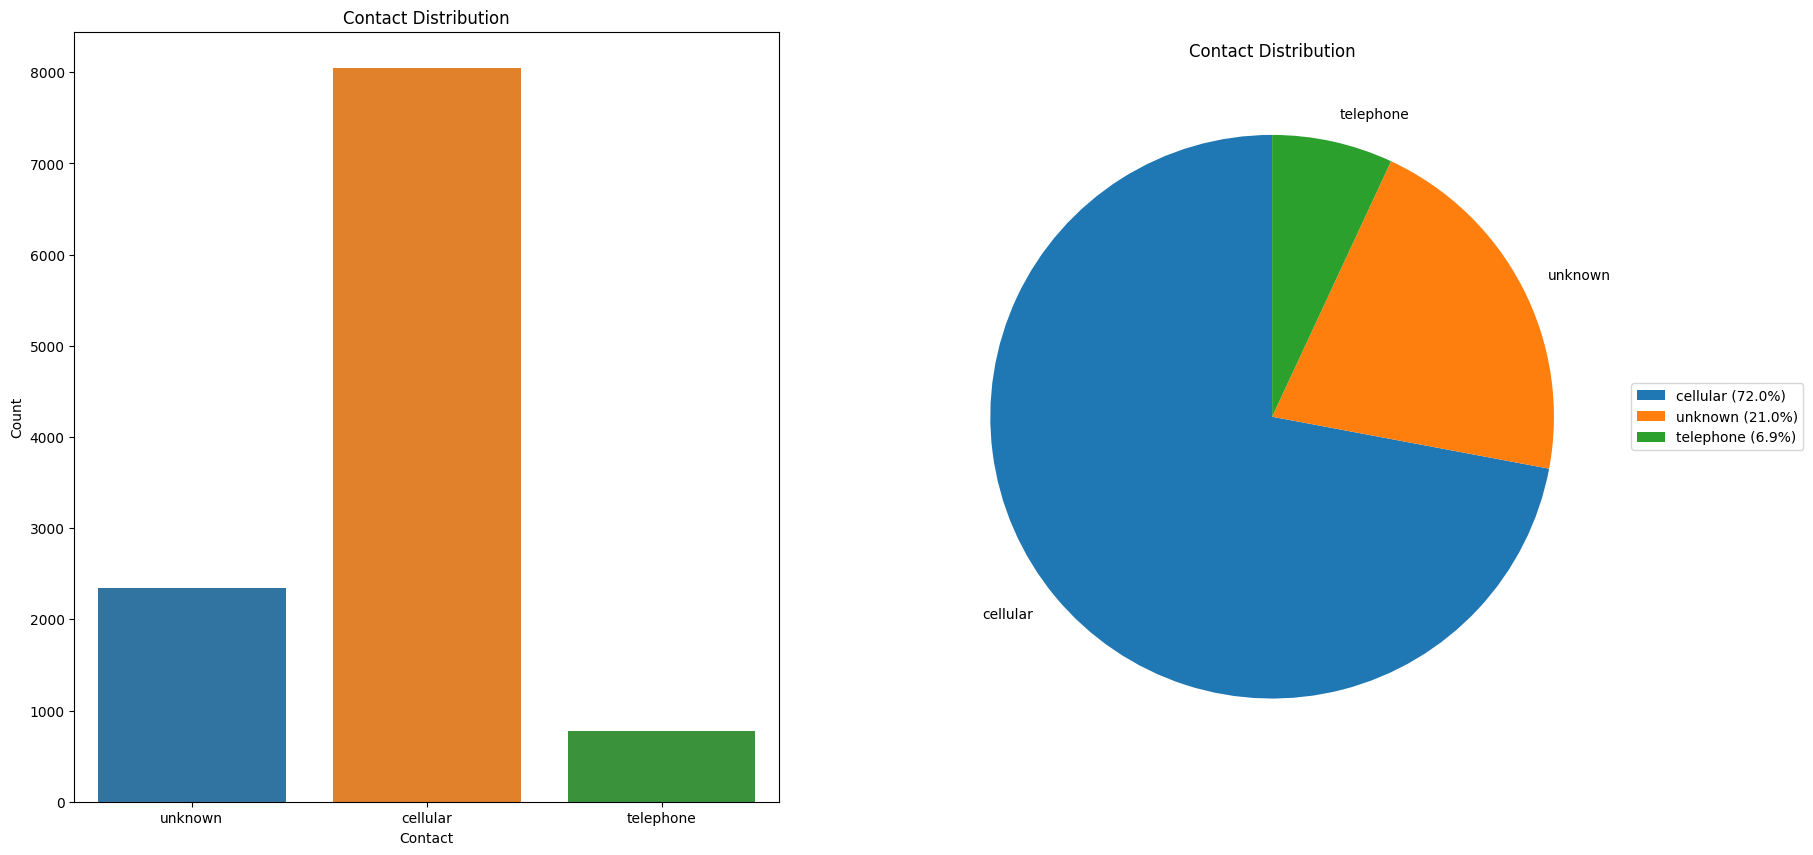

In [24]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='contact')
plt.title('Contact Distribution')
plt.xlabel('Contact')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['contact'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Contact Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

****Month****

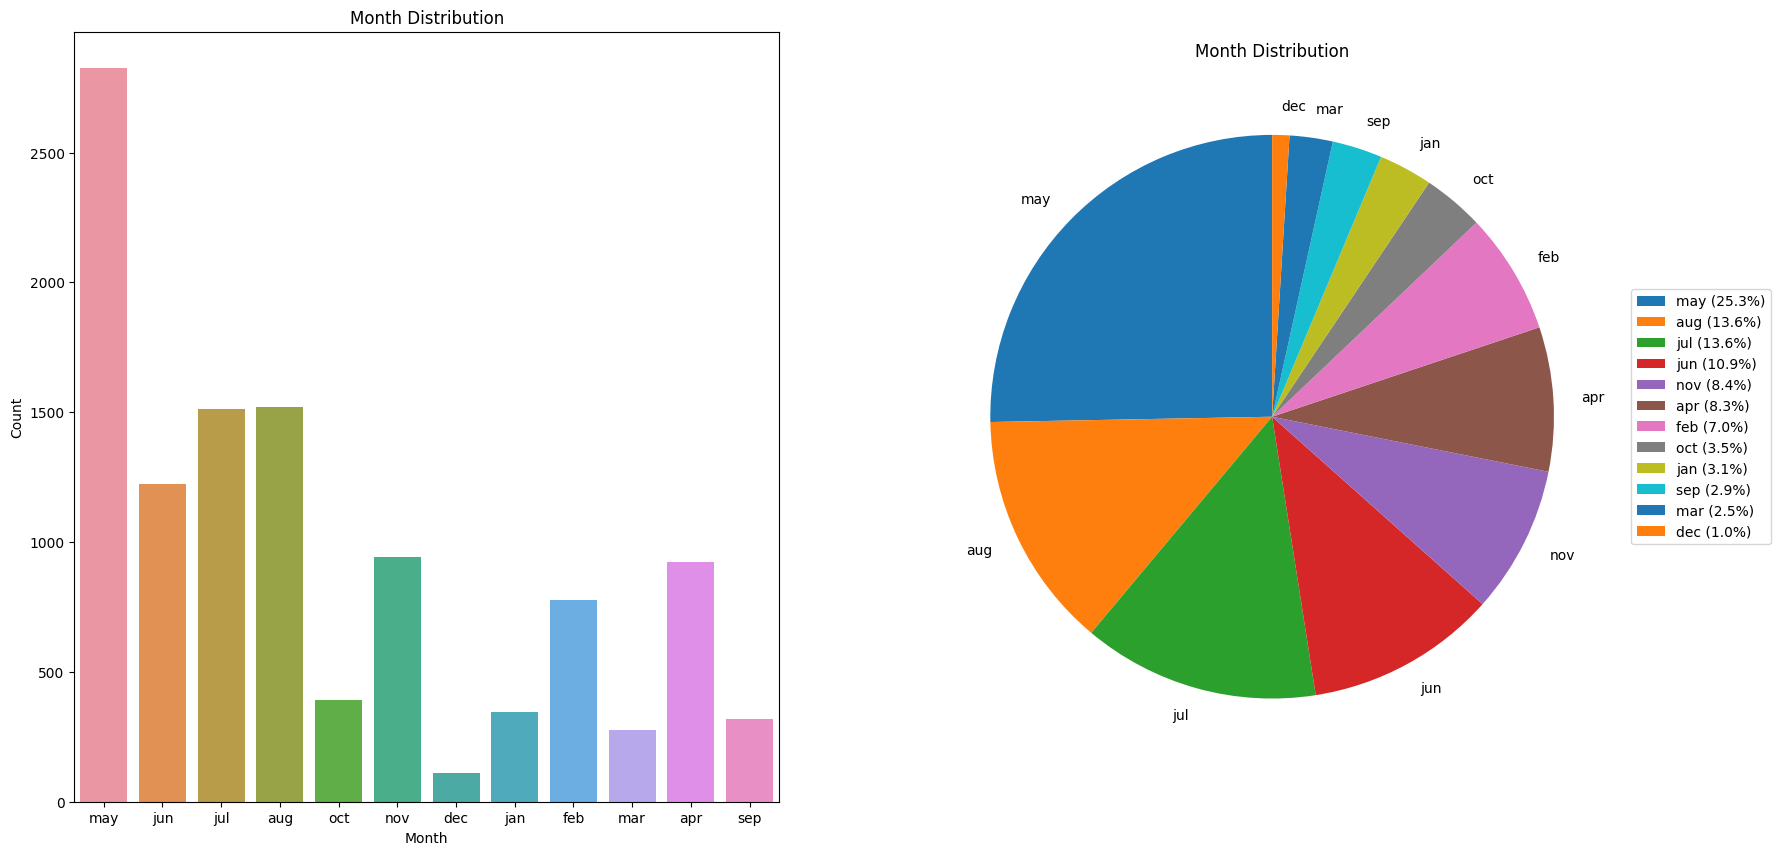

In [25]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='month')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['month'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Month Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Previous**

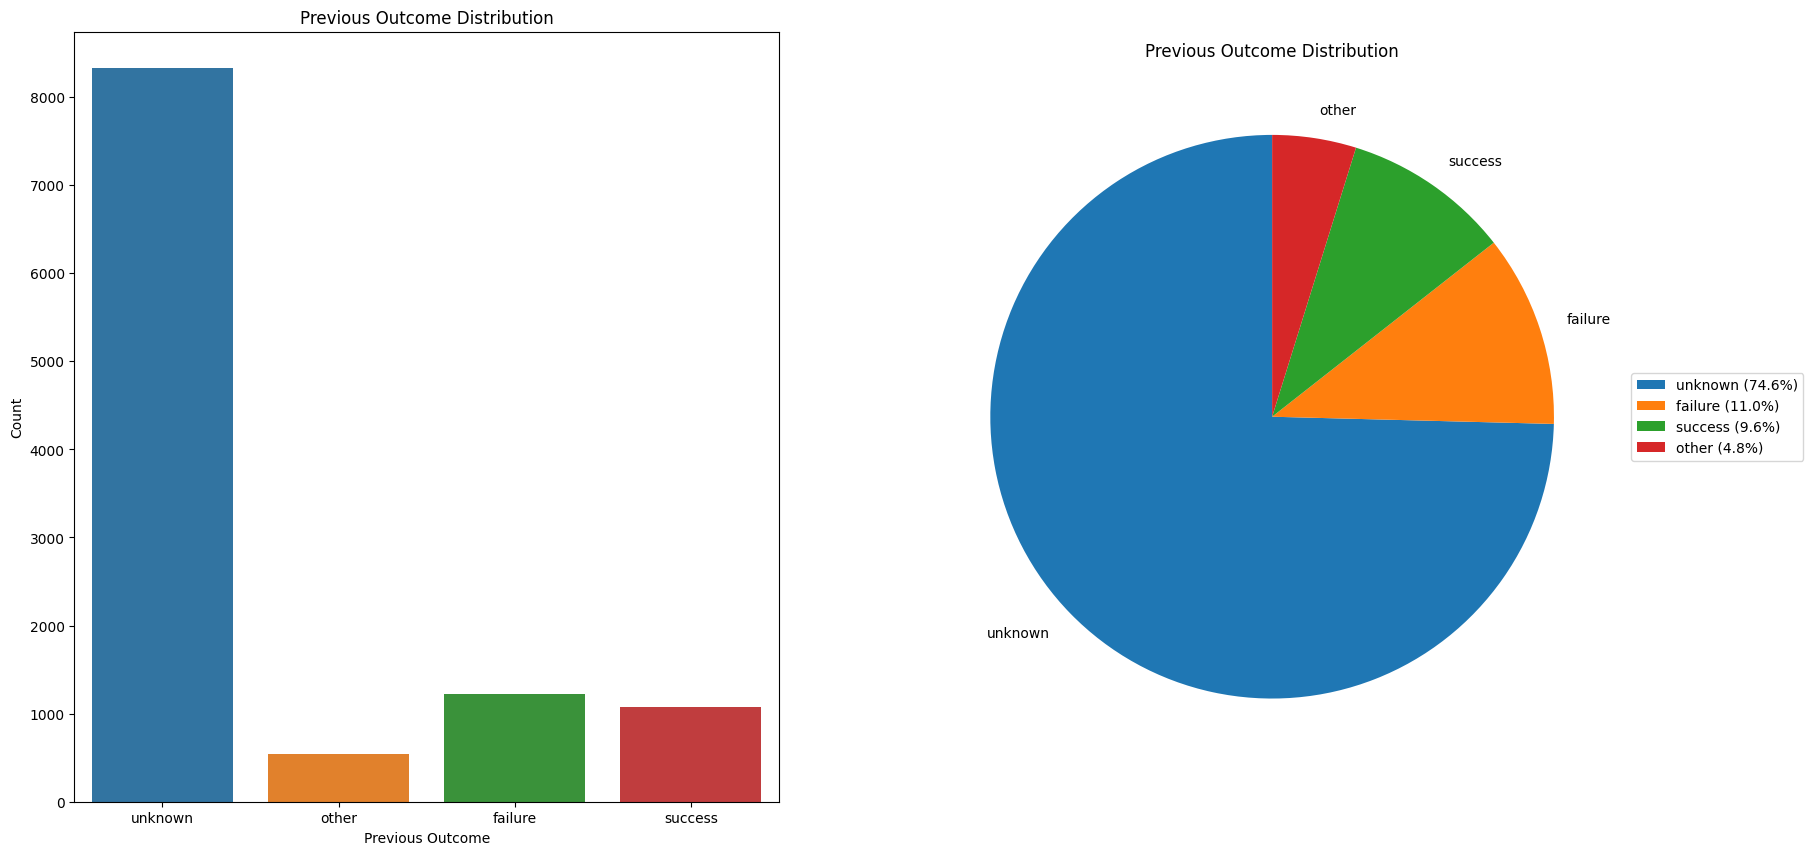

In [26]:
plt.figure(figsize=(20, 10))

# Plot the count plot on the left side
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='poutcome')
plt.title('Previous Outcome Distribution')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')

# Plot the pie chart on the right side
plt.subplot(1, 2, 2)
value_counts = df['poutcome'].value_counts()
labels = [str(x) for x in value_counts.index]
plt.pie(value_counts, labels=labels, startangle=90, pctdistance=0.85)
plt.title('Previous Outcome Distribution')

# Add percentage to legend
percentages = [f'{val/sum(value_counts)*100:.1f}%' for val in value_counts]
plt.legend(labels=[f'{label} ({percentage})' for label, percentage in zip(labels, percentages)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

***ONLY PIE CHARTS***

In [27]:
# Loop through each categorical column
for column in df.select_dtypes(include='object').columns:
    # Create a pie chart for the current column
    fig = px.pie(df, values=df[column].value_counts().values, names=df[column].value_counts().index, 
                 title=f"{column} Distribution")
    fig.show()

# Bivariate Analysis

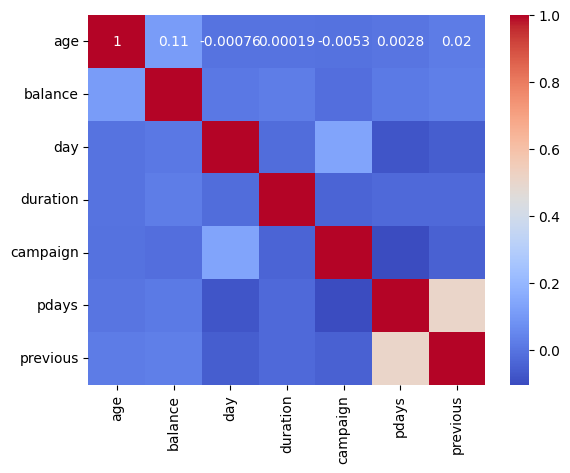

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

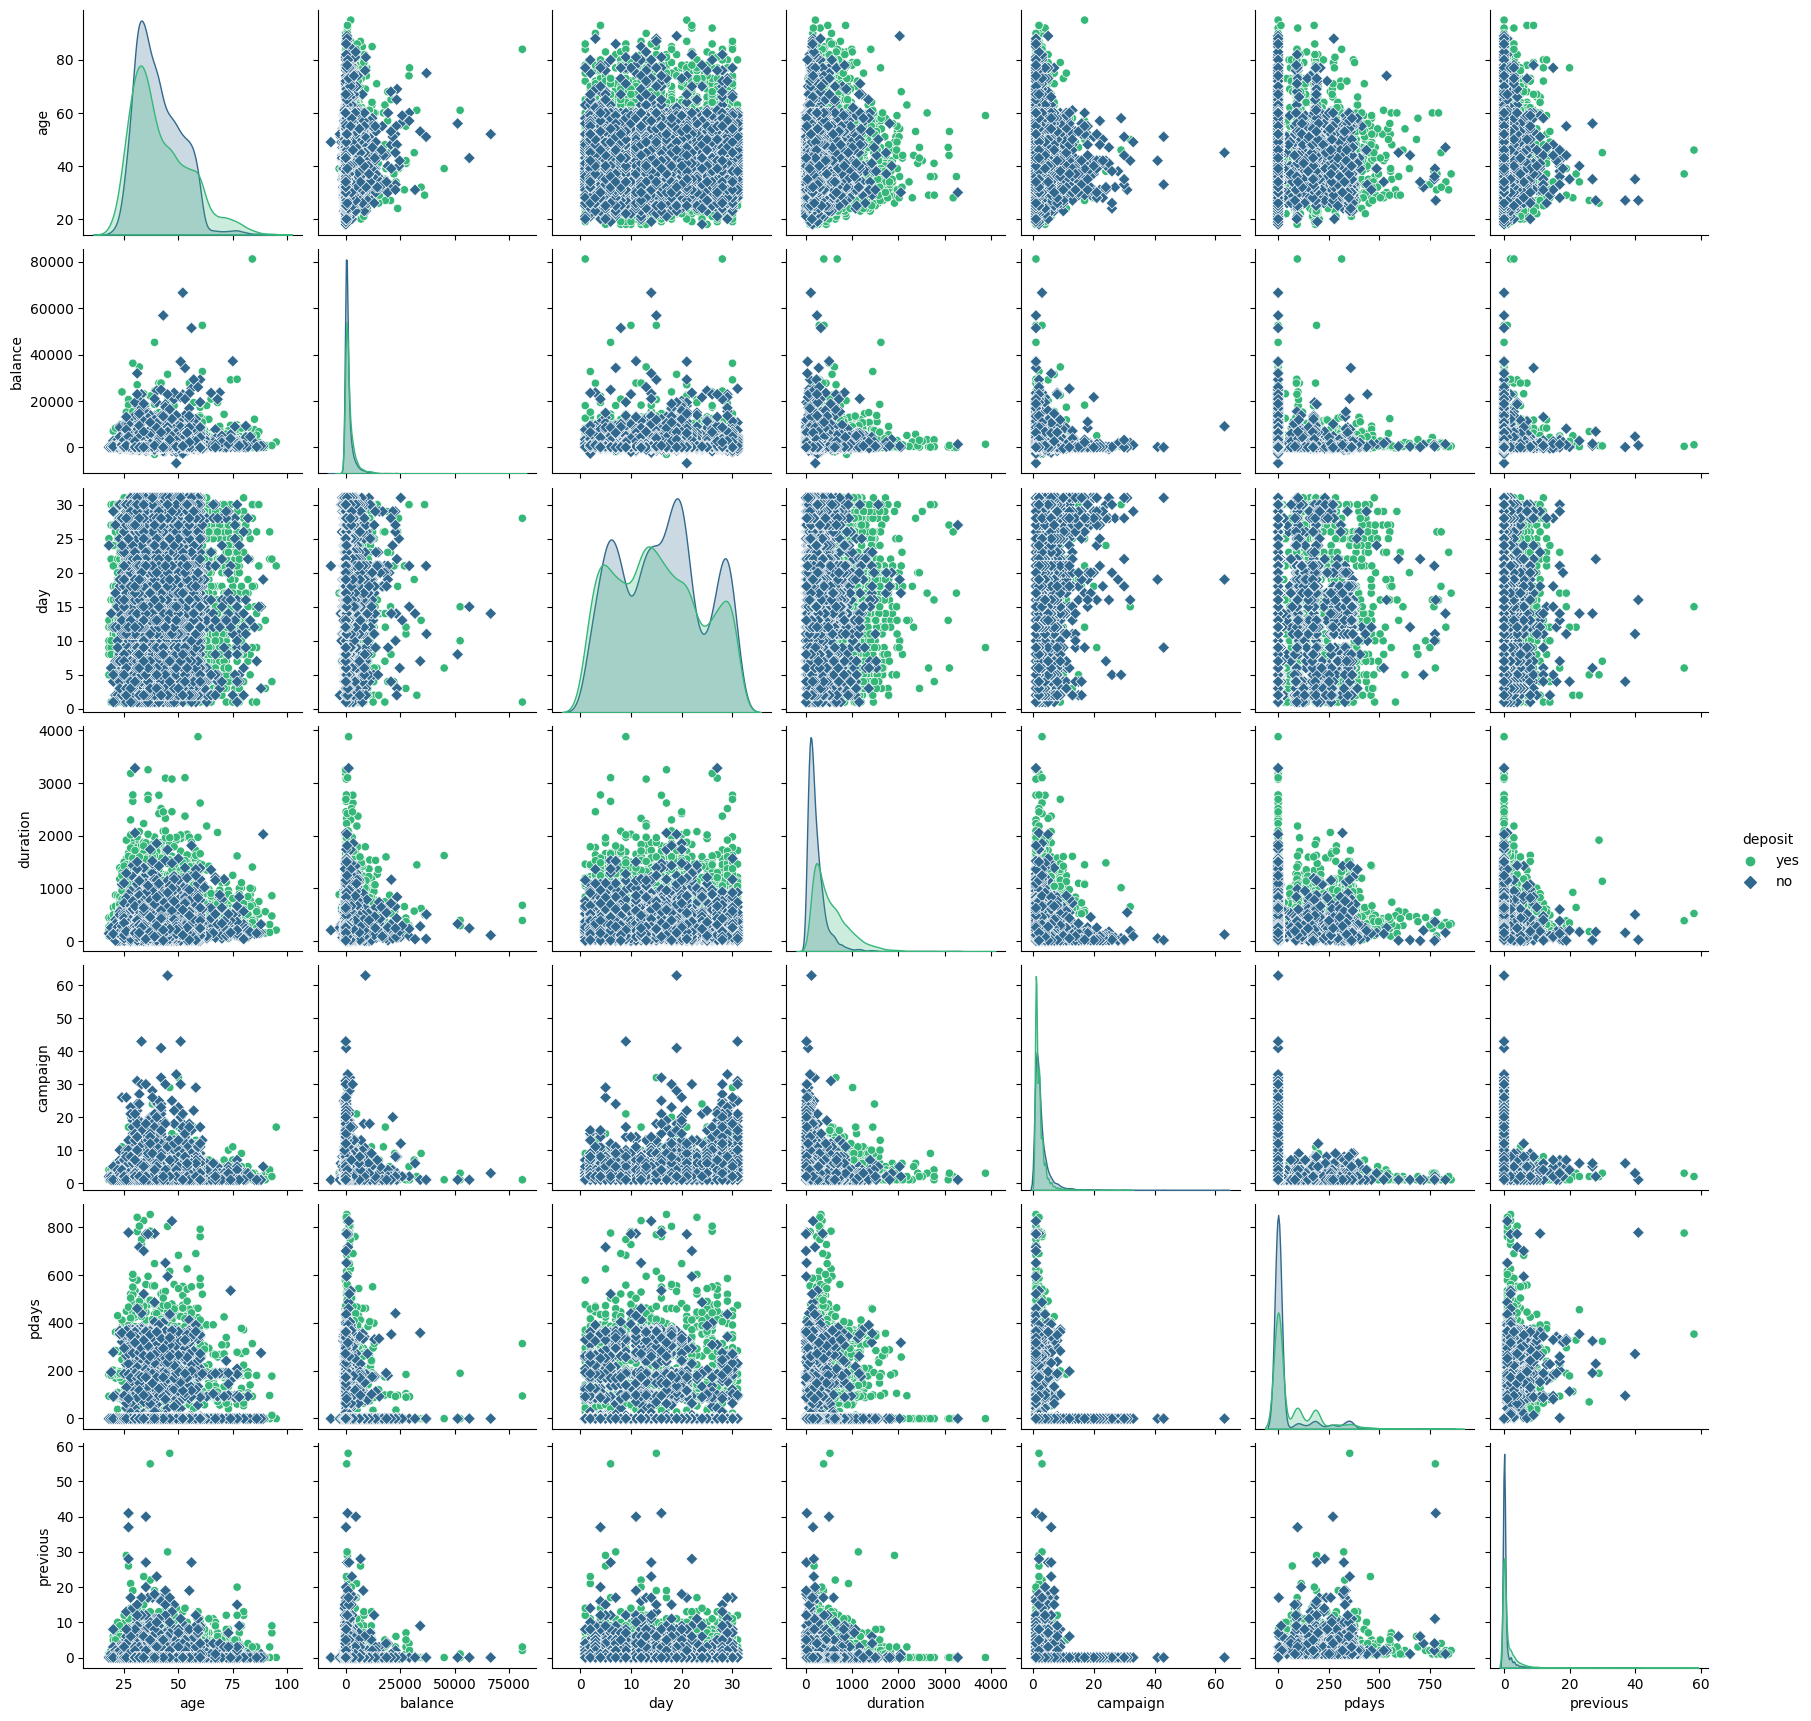

In [29]:
sns.pairplot(data=df, hue="deposit", markers=["o", "D"],corner=False,palette = 'viridis_r')
plt.show()

**CATEGORICAL VS CATEGORICAL**

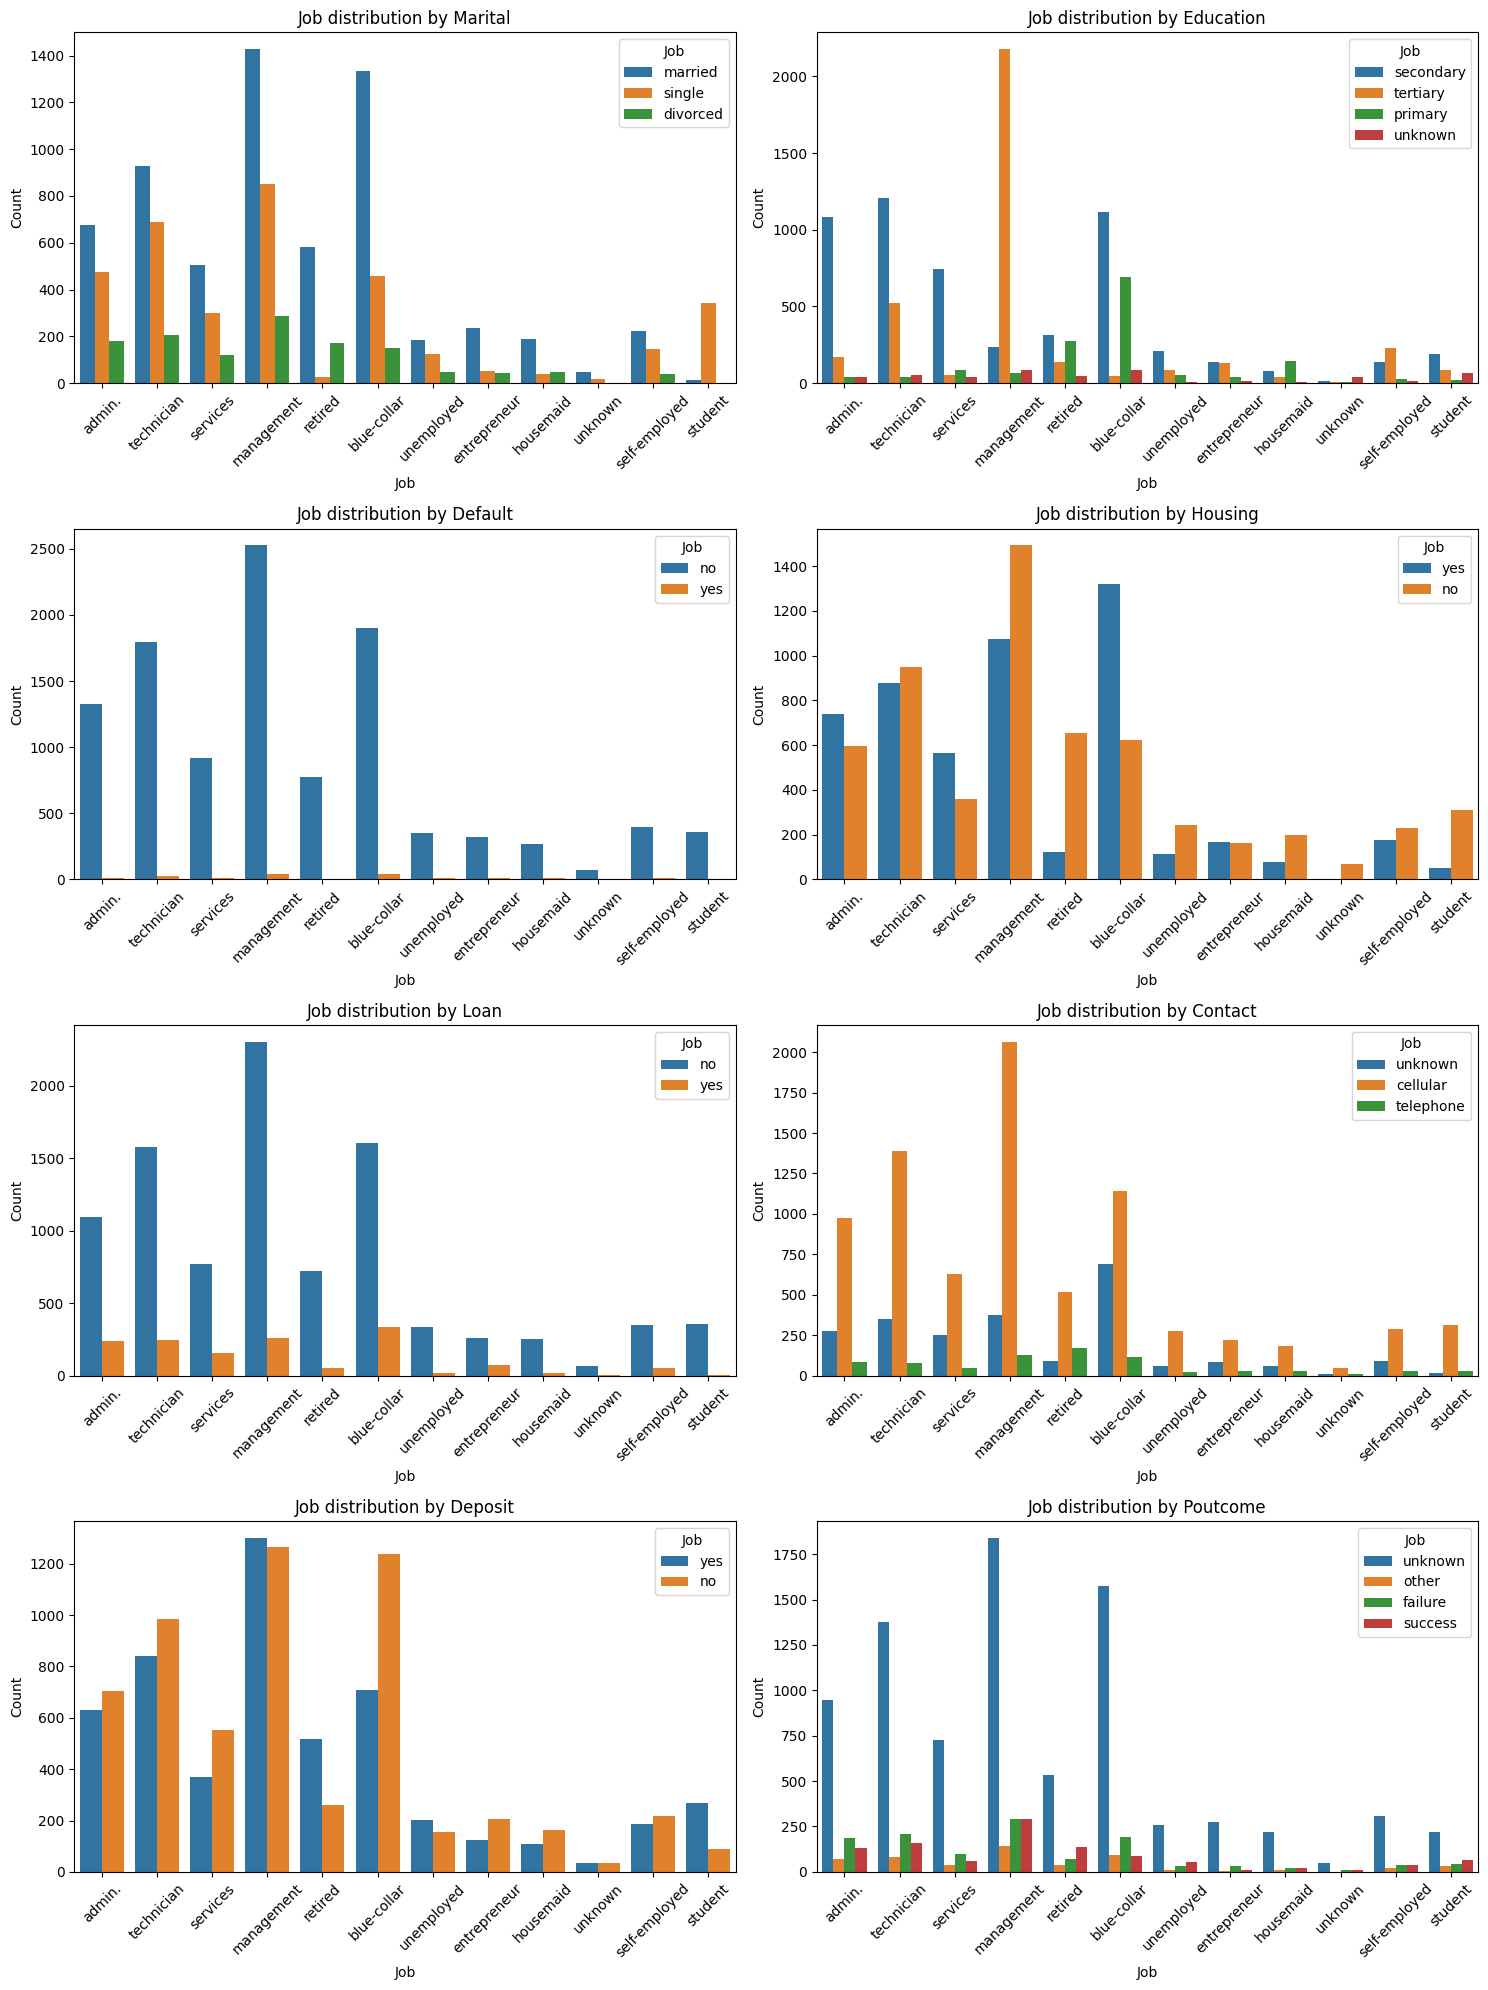

In [30]:
# Set up the figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Flatten axes for easier indexing
axes = axes.flatten()

# List of hue variables
hue_vars = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'deposit', 'poutcome']

# Loop through each hue variable and plot the countplot
for i, hue_var in enumerate(hue_vars):
    sns.countplot(data=df, x='job', hue=hue_var, ax=axes[i])
    axes[i].set_title(f'Job distribution by {hue_var.capitalize()}')
    axes[i].set_xlabel('Job')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Job', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


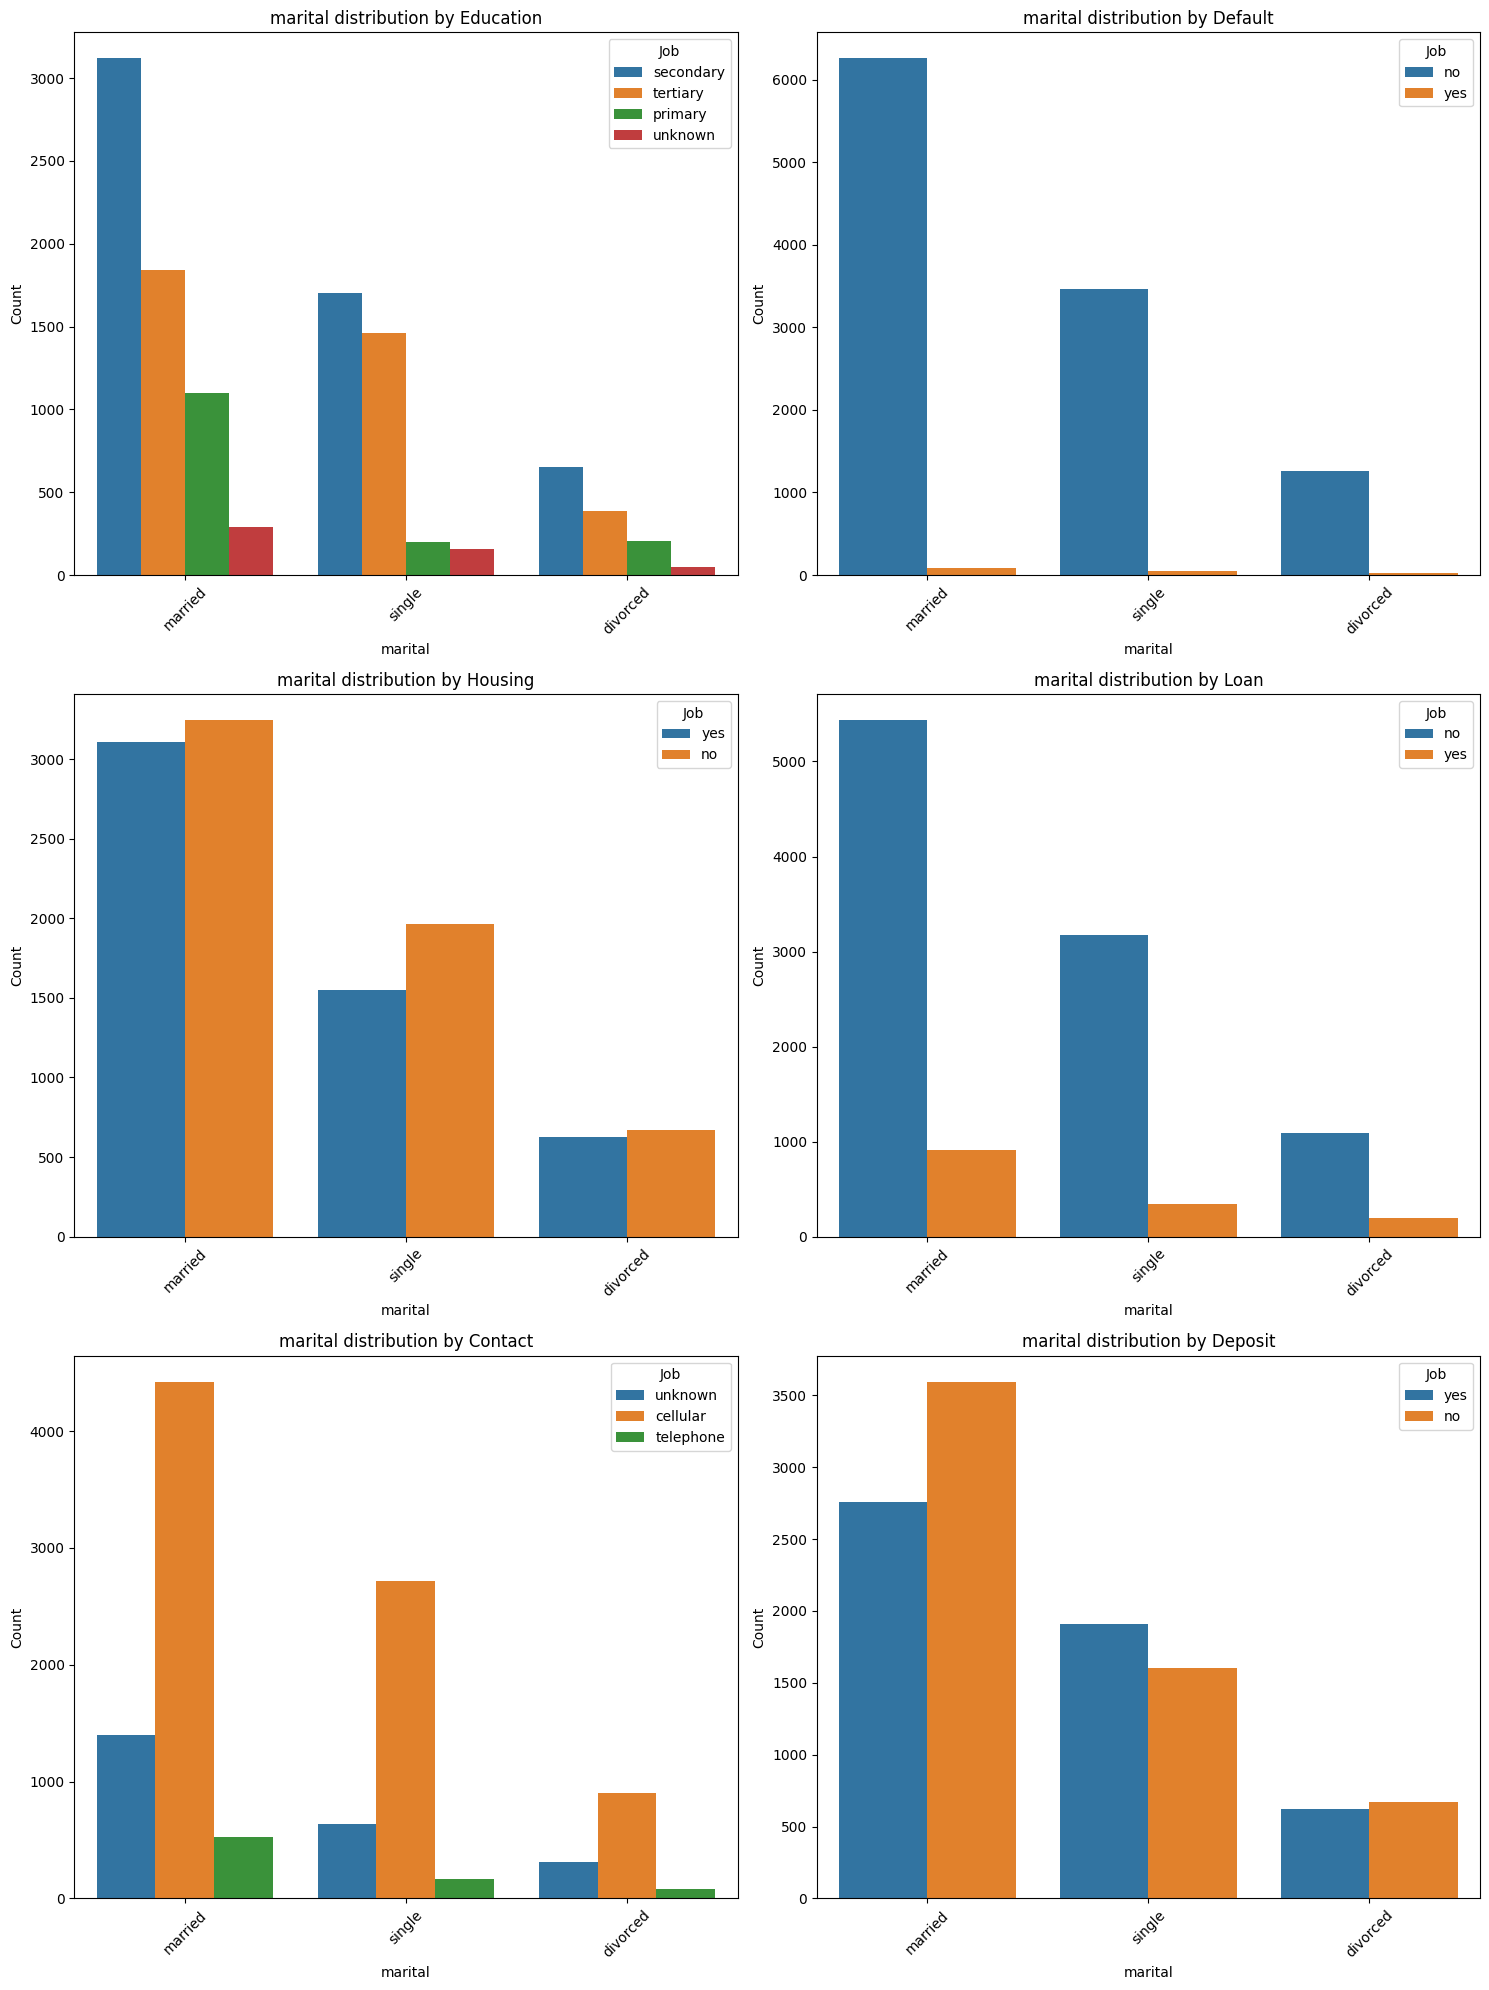

In [32]:
# Set up the figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Flatten axes for easier indexing
axes = axes.flatten()

# List of hue variables
hue_vars = [ 'education', 'default', 'housing', 'loan', 'contact', 'deposit']

# Loop through each hue variable and plot the countplot
for i, hue_var in enumerate(hue_vars):
    sns.countplot(data=df, x='marital', hue=hue_var, ax=axes[i])
    axes[i].set_title(f'marital distribution by {hue_var.capitalize()}')
    axes[i].set_xlabel('marital')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Job', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

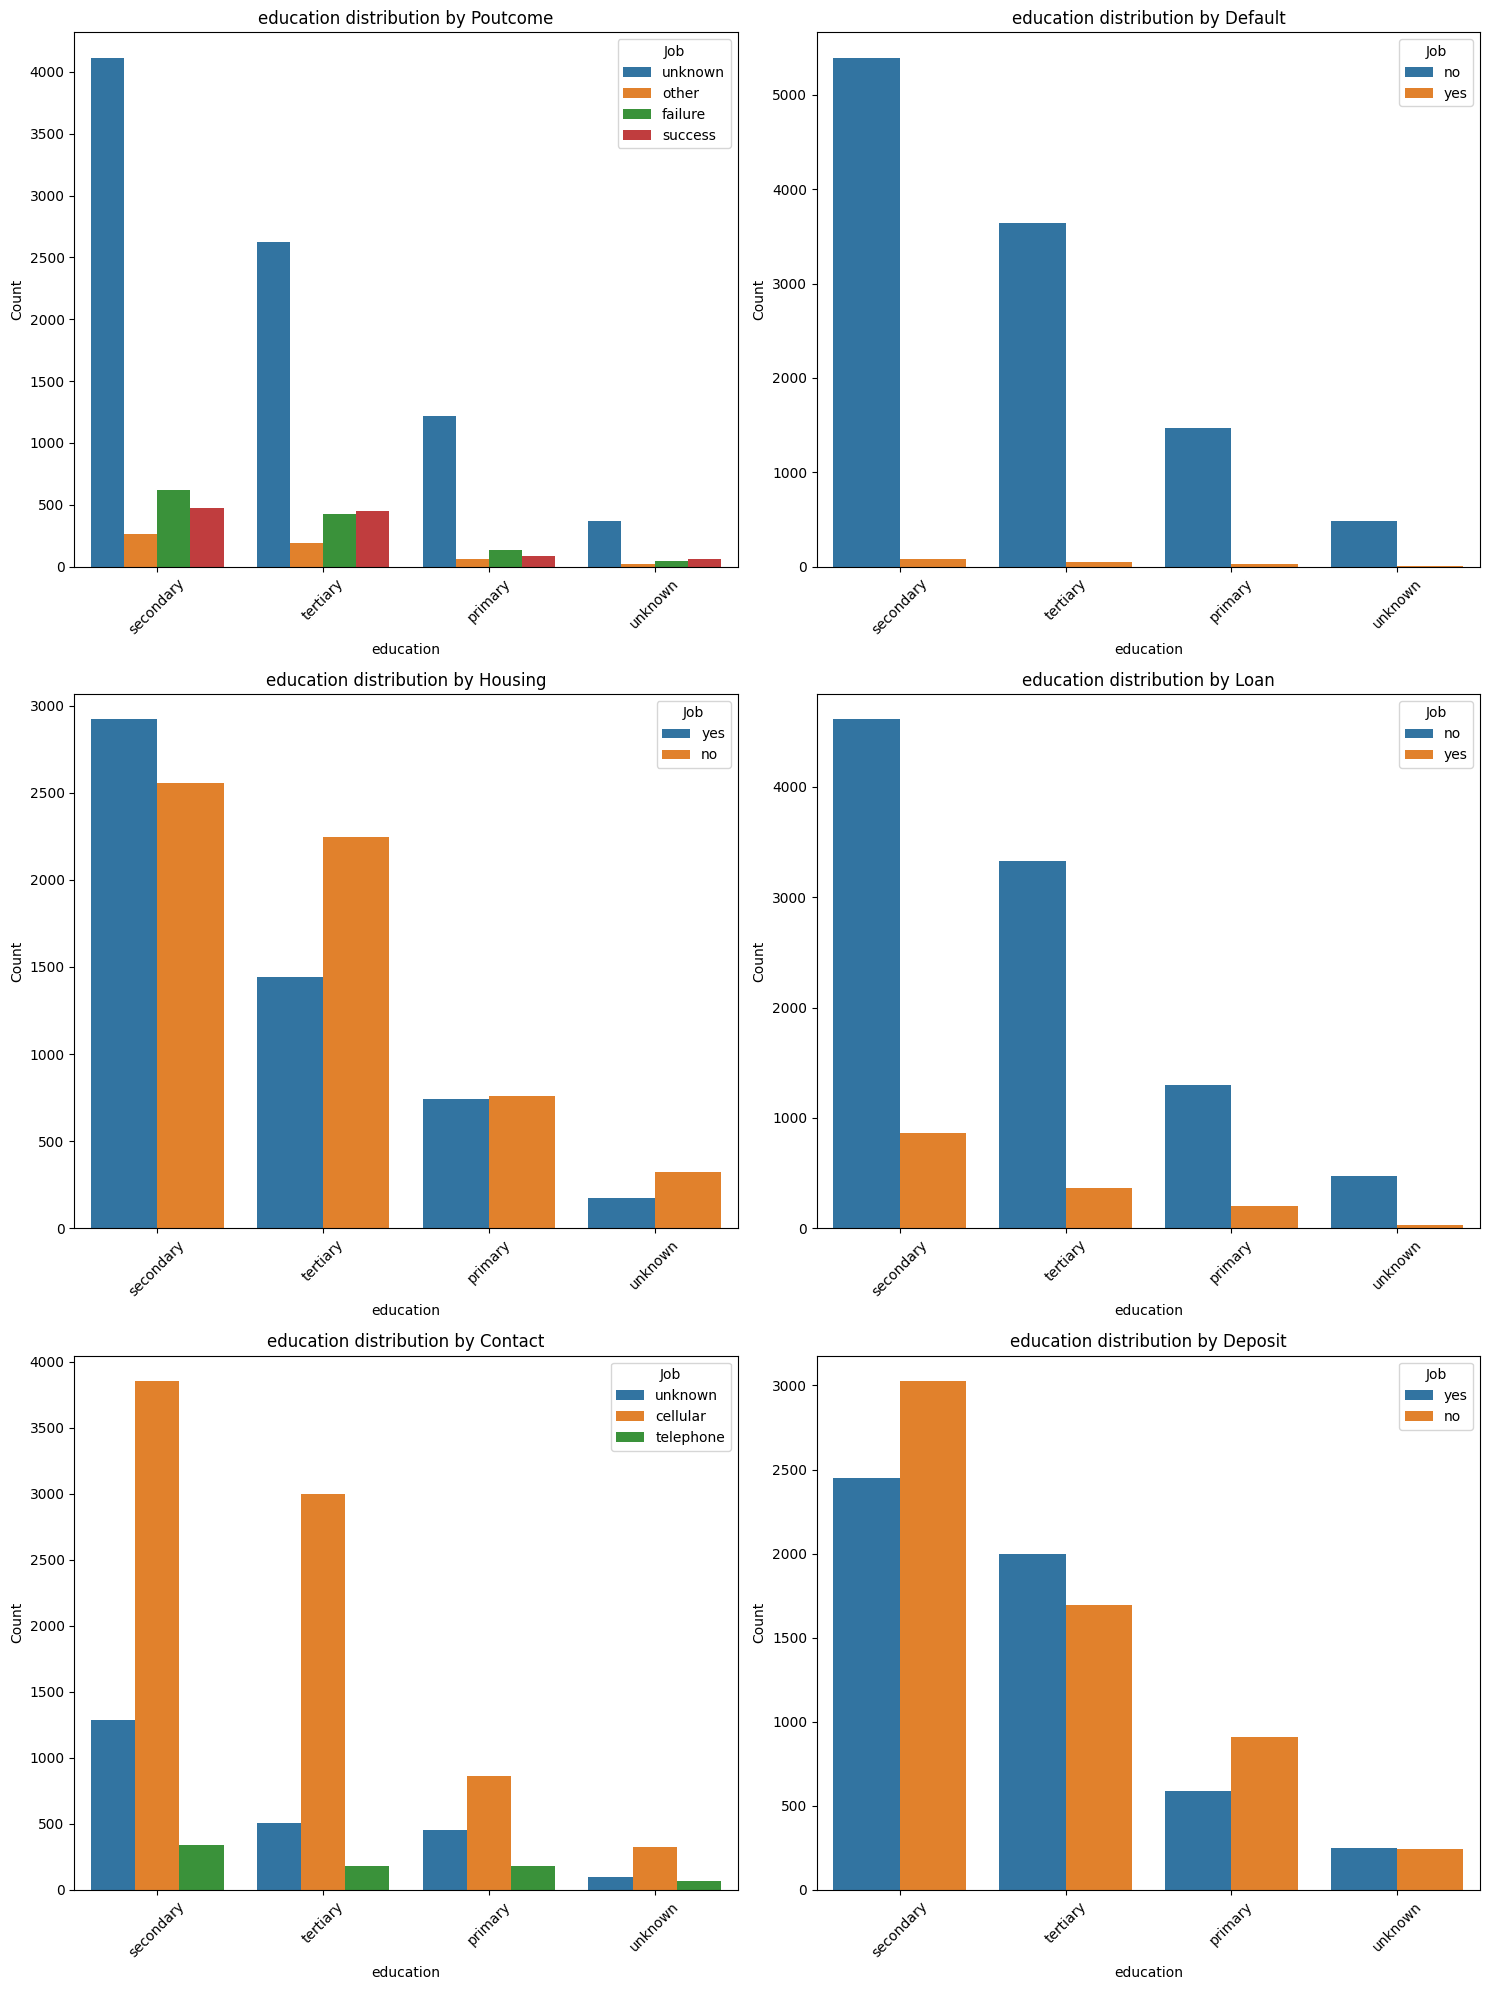

In [33]:
# Set up the figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Flatten axes for easier indexing
axes = axes.flatten()

# List of hue variables
hue_vars = [ 'poutcome', 'default', 'housing', 'loan', 'contact', 'deposit']

# Loop through each hue variable and plot the countplot
for i, hue_var in enumerate(hue_vars):
    sns.countplot(data=df, x='education', hue=hue_var, ax=axes[i])
    axes[i].set_title(f'education distribution by {hue_var.capitalize()}')
    axes[i].set_xlabel('education')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Job', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**CATEGORICAL VS NUMERICAL**

**(1) Relationship Between Balance and Loan**

In [34]:
data['balance_status'] = np.select([(data['balance'] < data["balance"].mean())], ["Below Average"],default="Above Average")
pd.crosstab(data['balance_status'], data['loan'])

loan              no   yes
balance_status            
Above Average   2829   230
Below Average   6873  1230

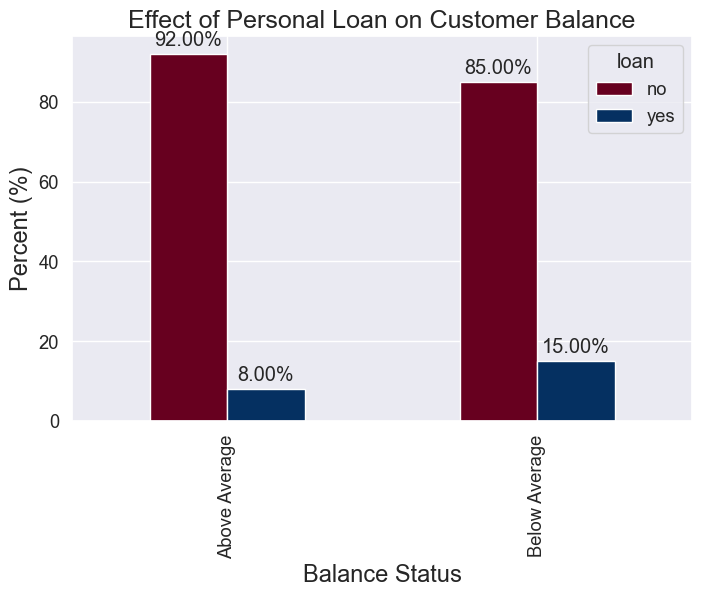

In [35]:
#Create a crosstab of balance_status and loan, then convert it to percentages
balanceCrosstab = pd.crosstab(data['balance_status'], data['loan']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

# Set the size and scale of the plot
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale=1.2)

# Plot the crosstab as a bar chart with the 'viridis' colormap
ax = balanceCrosstab.plot(kind='bar', stacked=False, colormap='RdBu')
plt.title("Effect of Personal Loan on Customer Balance", fontsize=18)
plt.xlabel("Balance Status", fontsize=17)
plt.ylabel("Percent (%)", fontsize=17)

# Annotate the bars with their height values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Insights:**
- Potential customers in the Low and No Balance category seem to be more likely to have Loan than those in the average and high balance category.

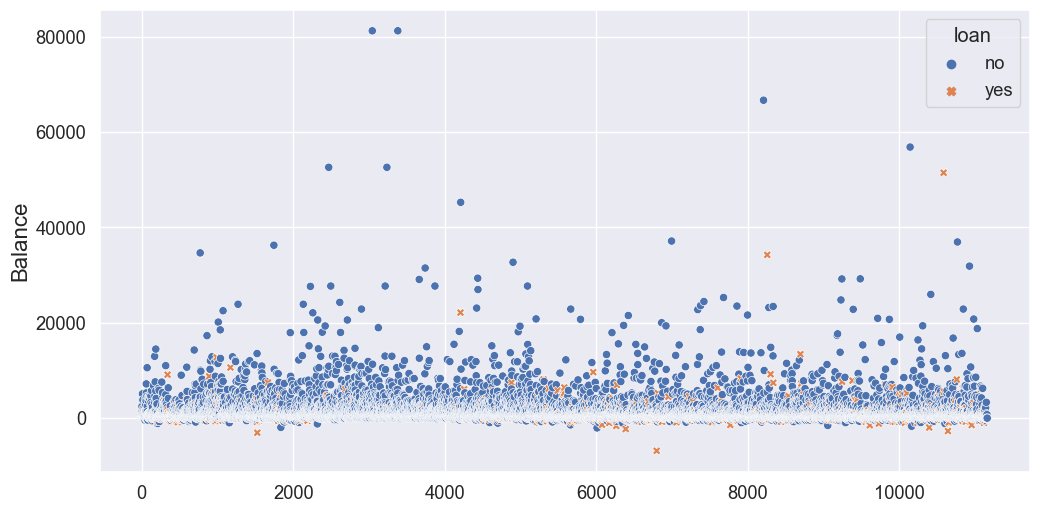

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=data, x=df.index, y='balance', hue='loan',style="loan",ax=ax)
plt.ylabel("Balance",fontsize=16)
plt.show()

The scatter plot does not provide clear insights into the relationship between account balance and loan status

Let's apply the one-way anova test to see the significance between the variables. Hypotheses for this:
- **Null Hypothesis (H0):**
There is no statistically significant difference between customers' balances for different loan statuses.

- **Alternative Hypothesis (H1):**
There is a statistically significant difference between customers' balances for different loan statuses.

In [37]:
from scipy.stats import f_oneway

# Group the balance data by loan status
CategoryGroupLists = data.groupby('loan')['balance'].apply(list)

# Perform one-way ANOVA
AnovaResults = f_oneway(*CategoryGroupLists)

# Print the p-value
print('The p-value as a result of the Analysis of Variance:', format(AnovaResults.pvalue, "0.5f"))

The p-value as a result of the Analysis of Variance: 0.00000


**Conclusion:**
- Based on the extremely low p-value obtained from the Analysis of Variance (ANOVA), we reject the null hypothesis. This indicates that there is a statistically significant difference between customers' balances for different loan statuses

**(2) Relationship Between Job and Age**

              job        age
0          admin.  39.374063
1     blue-collar  39.505144
2    entrepreneur  42.887195
3       housemaid  47.445255
4      management  40.218239
5         retired  65.424165
6   self-employed  39.809877
7        services  38.141928
8         student  26.102778
9      technician  39.001646
10     unemployed  40.997199
11        unknown  46.857143


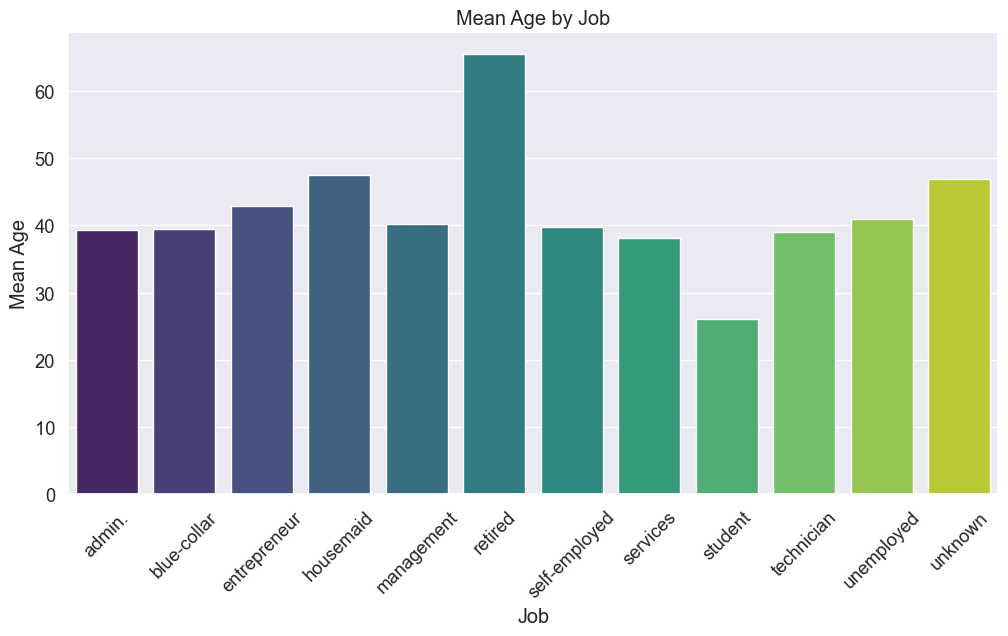

In [38]:
mean_age_by_job = df.groupby('job')['age'].mean().reset_index()
print(mean_age_by_job)


# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='age', data=mean_age_by_job, palette='viridis')
plt.xticks(rotation=45)
plt.title('Mean Age by Job')
plt.xlabel('Job')
plt.ylabel('Mean Age')
plt.show()

**INSIGHTS**
- The 'retired' category has the highest mean age, which is expected since retirement typically occurs at an older age. This group has a mean age over 60 years.
- The 'student' category has the lowest mean age, indicating that this group is comprised primarily of younger individuals, likely in their late teens to mid-twenties.

**(3) Relationship Between Job and Balance**

In [39]:
mean_balance_by_job = df.groupby('job')['balance'].mean().reset_index()
# print(mean_balance_by_job)

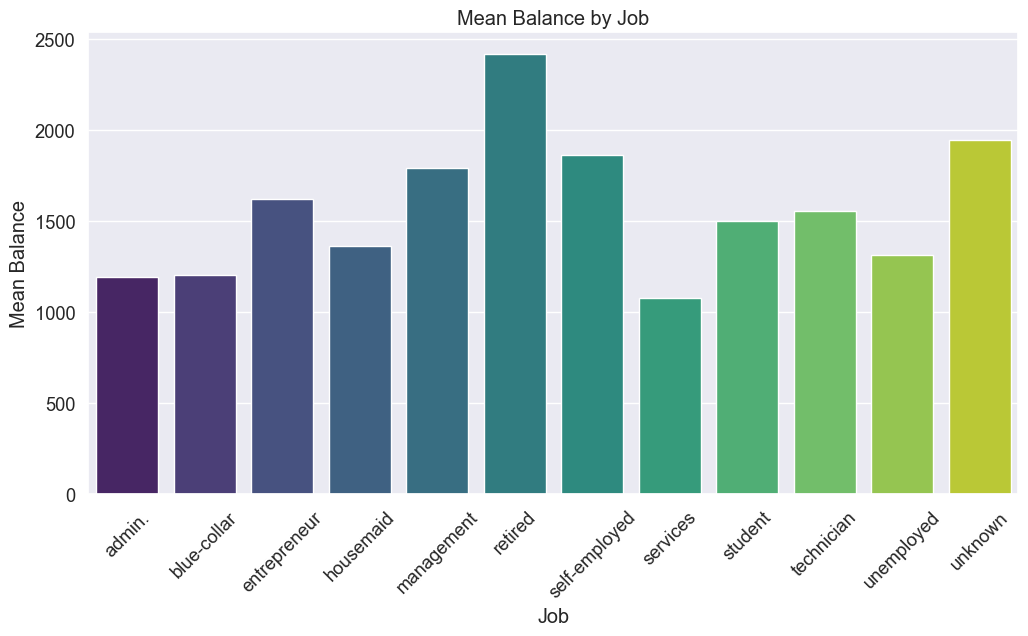

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='balance', data=mean_balance_by_job, palette='viridis')
plt.xticks(rotation=45)
plt.title('Mean Balance by Job')
plt.xlabel('Job')
plt.ylabel('Mean Balance')
plt.show()

**INSIGHTS**
- The 'retired' category shows the highest mean balance, indicating that retired individuals tend to have higher average balances in their bank accounts compared to other job categories.
- The 'self-employed' and 'management' categories also have high mean balances, suggesting that these groups maintain substantial balances as well.
- The 'services' category shows the lowest mean balance, indicating that individuals in service jobs tend to have lower average balances.
- The 'unknown' category has a relatively high mean balance. This could indicate that individuals whose job is not specified might have significant funds, but it's important to investigate this category further to understand why these entries are labeled as 'unknown'.
- Categories such as 'blue-collar', 'technician', and 'student' have moderate mean balances. This could reflect typical earning and saving patterns for these job types.

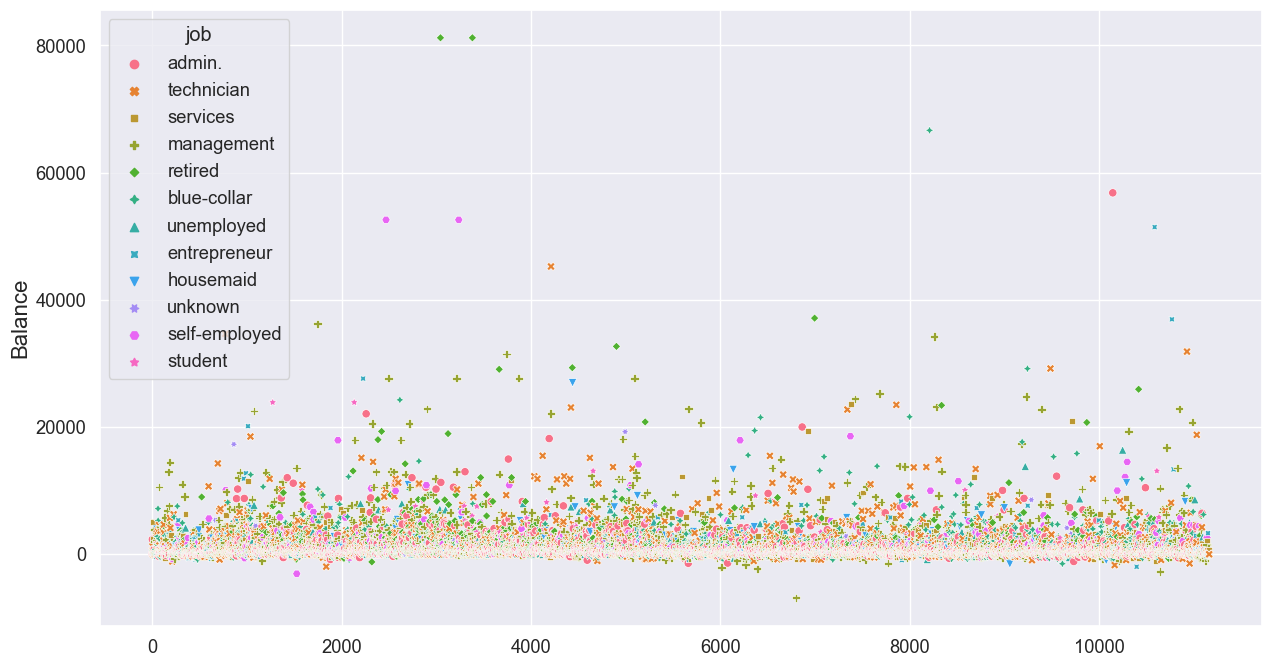

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x=df.index, y='balance', hue='job', style="job", ax=ax)
plt.ylabel("Balance", fontsize=16)
plt.show()

**H0:** There is no statistically significant difference between customers' balances and business.

**H1:** There is a difference between customer balances and business.

In [42]:
from scipy.stats import f_oneway

# Group the balance data by job categories
CategoryGroupLists = data.groupby('job')['balance'].apply(list)

# Perform one-way ANOVA
AnovaResults = f_oneway(*CategoryGroupLists)

# Print the p-value
print('The p-value as a result of the Analysis of Variance:', format(AnovaResults.pvalue, "0.5f"))


The p-value as a result of the Analysis of Variance: 0.00000


**Conclusion:**
- This indicates that there is a statistically significant difference in mean balance among different job categories.

**(4) JOB AND DEPOSIT**

In [43]:
pd.crosstab(df['job'], df['deposit'])

deposit          no   yes
job                      
admin.          703   631
blue-collar    1236   708
entrepreneur    205   123
housemaid       165   109
management     1265  1301
retired         262   516
self-employed   218   187
services        554   369
student          91   269
technician      983   840
unemployed      155   202
unknown          36    34

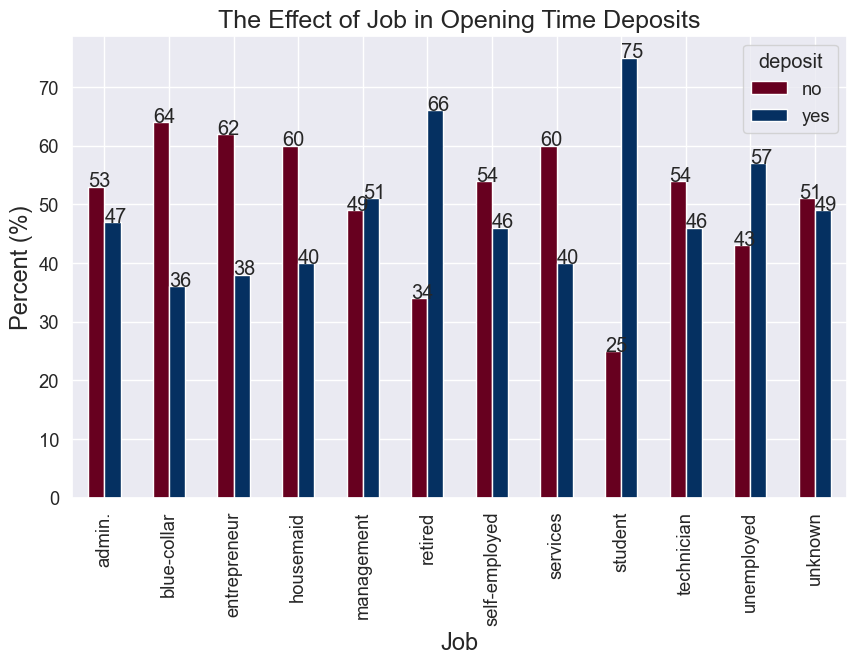

In [44]:
jobCrosstab = pd.crosstab(df['job'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1.2)

ax = jobCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Effect of Job in Opening Time Deposits", fontsize=18)
plt.xlabel("Job", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

It is seen that Students and Retirees are more likely to Open Time Deposits.

**(5) AGE AND DEPOSIT**

In [45]:
data['age_status'] = np.select(
    [
        data['age'].between(0, 25, inclusive=True), 
        data['age'].between(25, 60, inclusive=True),
        data['age'].between(60, 90, inclusive=True)        
    ], 
    [
        '0-25 years old', 
        '25-60 years old',
        '60-90 years old', 
    ], 
    default='Over 90 years old'
)
pd.crosstab(data['age_status'], data['deposit'])

deposit              no   yes
age_status                   
0-25 years old      130   320
25-60 years old    5634  4467
60-90 years old     109   497
Over 90 years old     0     5

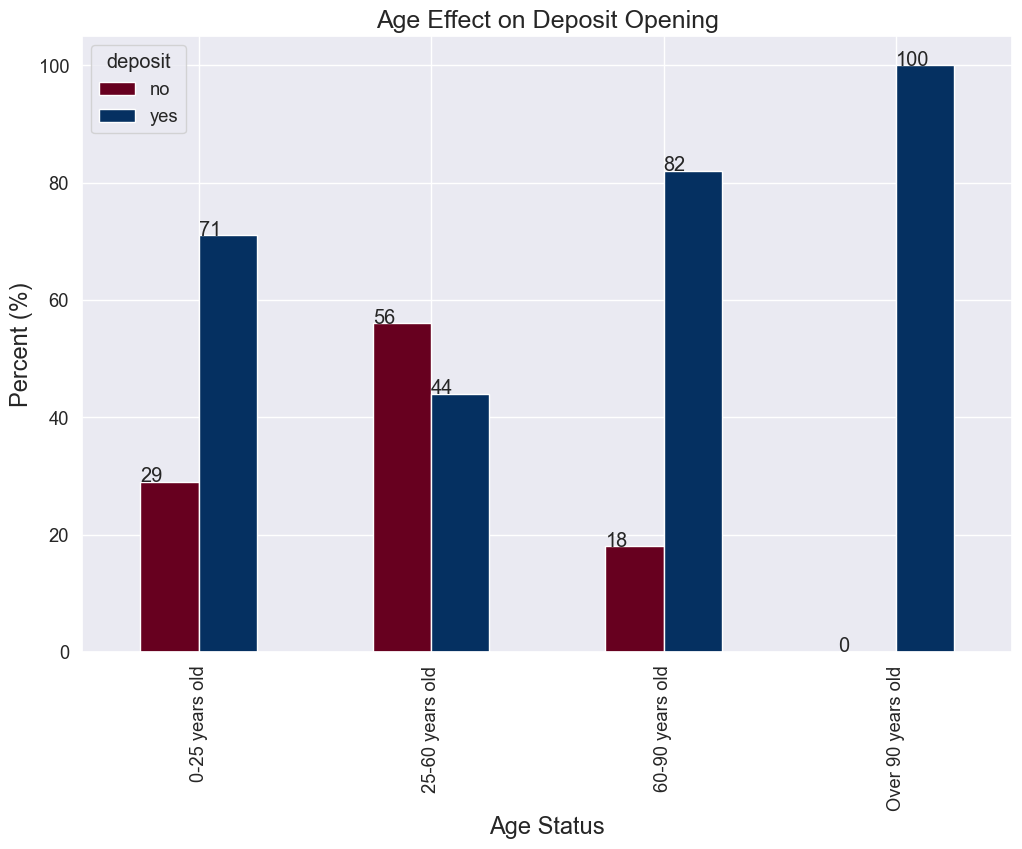

In [46]:
ageCrosstab = pd.crosstab(data['age_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = ageCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Age Effect on Deposit Opening", fontsize=18)
plt.xlabel("Age Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

**Interpretation:**
- Young Adults (0-25 years): There is a high inclination to open deposits among the younger age group, indicating that younger people might be more responsive to the bank's marketing efforts or more interested in saving and investing at an early age.
- Middle-Aged Adults (25-60 years): This age group shows a mixed response, with almost equal percentages of yes and no, suggesting a more diverse set of financial priorities and circumstances.
- Older Adults (60-90 years): This age group has a high percentage of deposit openings, which could indicate a stronger focus on saving or investing as they approach or are in retirement.
- Very Elderly (Over 90 years): The data shows a 100% deposit opening rate, which could suggest that those who are still financially active at this age are highly likely to invest in deposits.

**(6) MARITAL AND DEPOSIT**

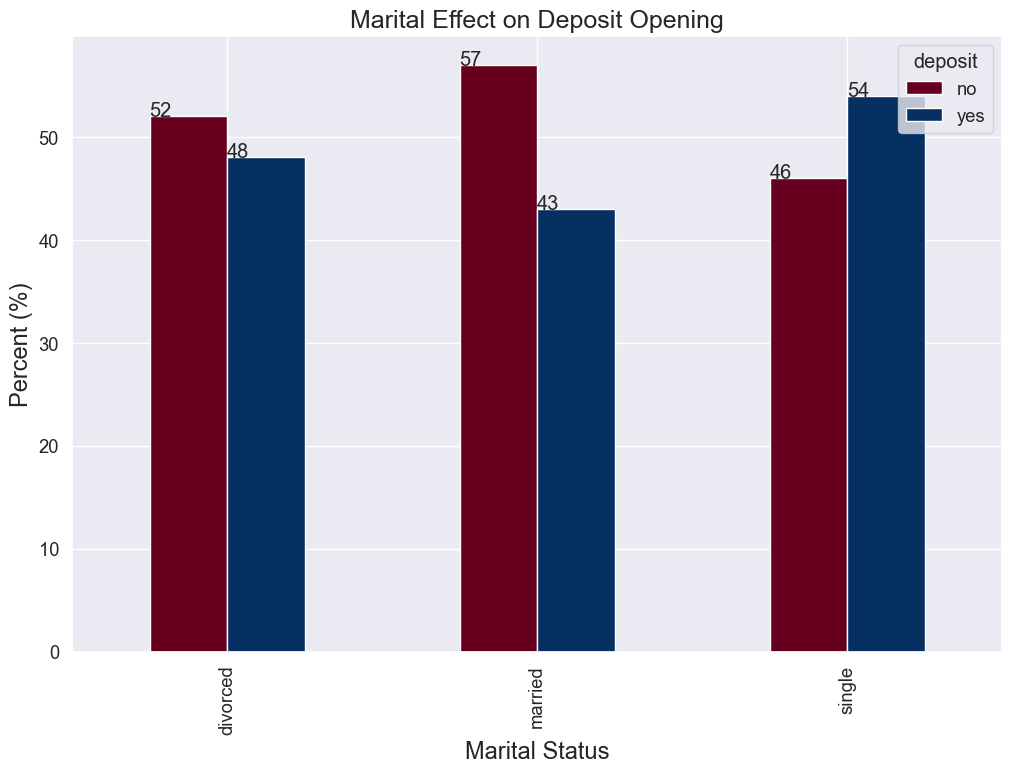

In [47]:
marCrosstab = pd.crosstab(data['marital'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = marCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Marital Effect on Deposit Opening", fontsize=18)
plt.xlabel("Marital Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

**Interpretation:**

- Married Individuals: The high number of deposits among married individuals could suggest that they have more financial stability or responsibilities, leading them to save and invest more frequently. They might also be more targeted by the bank's marketing campaigns.
- Single Individuals: Single individuals have a lower count of deposits compared to married individuals but higher than divorced individuals. This might indicate a moderate level of financial activity in terms of savings and investment.
- Divorced Individuals: The relatively low number of deposits among divorced individuals might be due to financial constraints or different financial priorities post-divorce. They might also be less targeted by marketing campaigns or have less financial stability.

**(7) Effect of Duration on Deposit Opening**

In [50]:
avgDuration = data['duration'].mean()

In [51]:
print(f"""Number of customers contacted for more than average time : {data[data['duration'] > avgDuration]['duration'].count()} 
Number of customers contacted with less than average time : {data[data['duration'] < avgDuration]['duration'].count()}""")

Number of customers contacted for more than average time : 3845 
Number of customers contacted with less than average time : 7317


In [52]:
# Calculate average duration
avgDuration = data['duration'].mean()

# Categorize duration into "Below Average" and "Above Average"
data['duration_status'] = np.where(data['duration'] < avgDuration, "Below Average", "Above Average")

# Create cross-tabulation
duration_deposit_crosstab = pd.crosstab(data['duration_status'], data['deposit'])

# Display the cross-tabulation
duration_deposit_crosstab

deposit            no   yes
duration_status            
Above Average     870  2975
Below Average    5003  2314

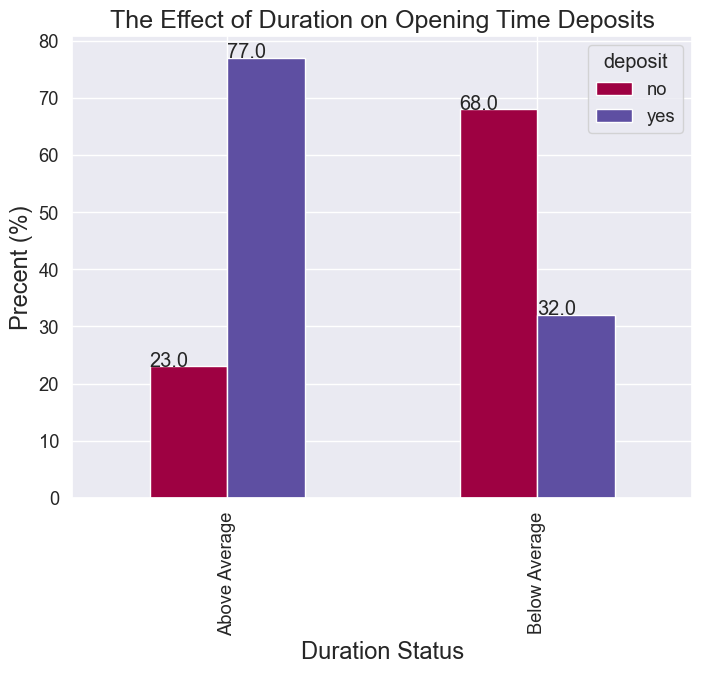

In [53]:
durCrosstab = pd.crosstab(data['duration_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(8,6)})
sns.set(font_scale=1.2)

ax = durCrosstab.plot(kind='bar', stacked=False, cmap='Spectral')
plt.title("The Effect of Duration on Opening Time Deposits", fontsize=18)
plt.xlabel("Duration Status", fontsize=17);
plt.ylabel("Precent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() *1, p.get_height() * 1))

plt.show()

**Insights:**
- 77% of customers who are 'above the average' of the time spent for customer communication (duration) have opened a Deposit Account (deposit). Only 32% of customers contacted withbelow-average` time opened a Deposit Account. This tells us it's a good idea to target customers with above average conversations.

- The graph indicates a strong positive correlation between call duration and the likelihood of opening a deposit, emphasizing the importance of thorough and engaging communication during customer interactions.

**(8) Month & Deposit**

In [54]:
pd.crosstab(data['month'], data['deposit'])

deposit    no  yes
month             
apr       346  577
aug       831  688
dec        10  100
feb       335  441
jan       202  142
jul       887  627
jun       676  546
mar        28  248
may      1899  925
nov       540  403
oct        69  323
sep        50  269

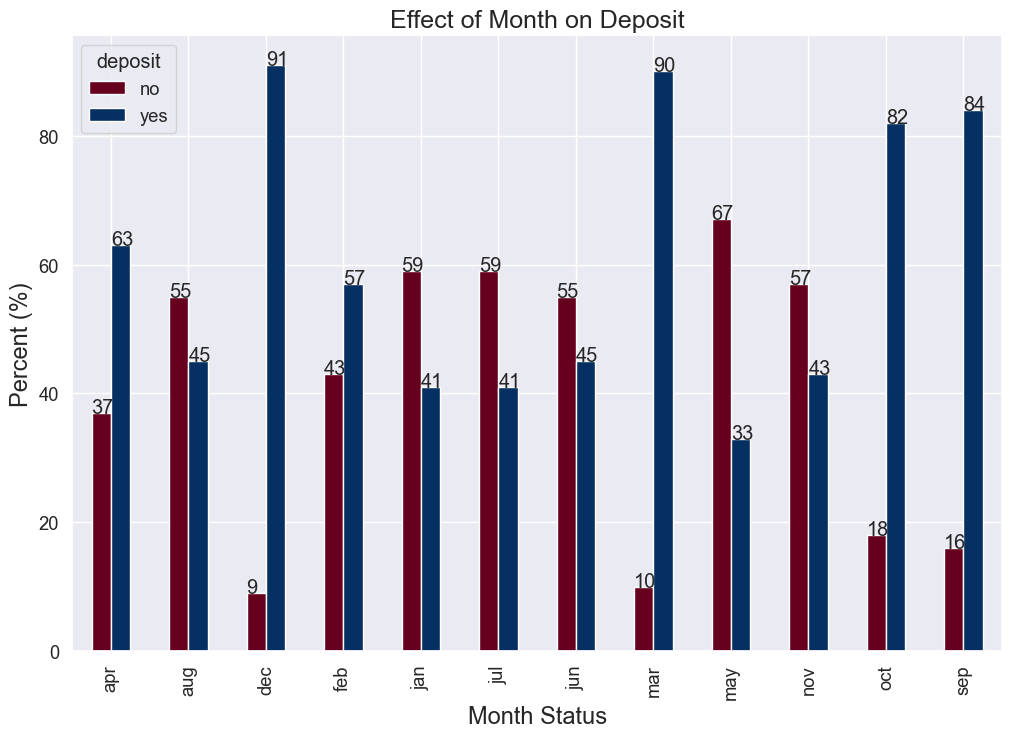

In [56]:
monthCrosstab = pd.crosstab(data['month'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = monthCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Effect of Month on Deposit", fontsize=18)
plt.xlabel("Month Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

**Insights:**
- In September-October-March and December, the rate of opening time deposits is very high.

**9) The Effect of Campaign Calls in Opening Time Deposits**

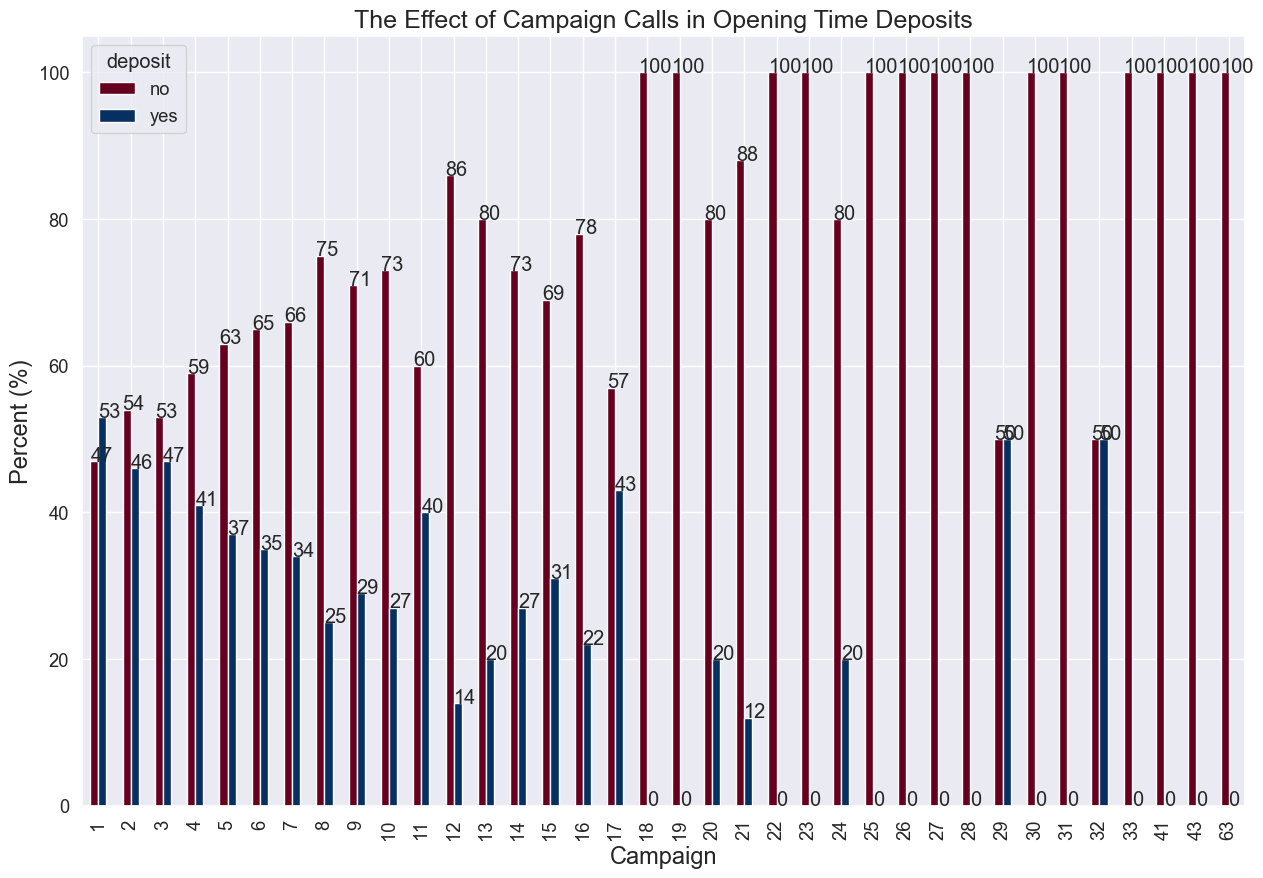

In [57]:
campaignCrosstab = pd.crosstab(data['campaign'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.2)

ax = campaignCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Effect of Campaign Calls in Opening Time Deposits", fontsize=18)
plt.xlabel("Campaign", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> It is seen that the probability of Opening Time Deposits decreased after the 3rd meeting with the potential customer.

## HANDLE CATEGORICAL COLUMNS

In [58]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Calculating value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for job:
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


Value counts for marital:
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


Value counts for education:
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


Value counts for default:
no     10994
yes      168
Name: default, dtype: int64


Value counts for housing:
no     5881
yes    5281
Name: housing, dtype: int64


Value counts for loan:
no     9702
yes    1460
Name: loan, dtype: int64


Value counts for contact:
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


Value counts for month:
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb    

In [59]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

**1) Label encoding on Target Variable**

In [60]:
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit'])
df.head(10)

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1  
5  unknown    5   may       562         2     -1         0  unknown        1  
6  unknown    6   may      1201         1     -1         0  unknown        1  
7  unknown    6   may      1030         1     -1         0  unknown        1  
8  unknown    6   may       608         1     -1         0  unknown        1  
9  unknown    6   may      1297         3     -1         0  unknown        1

**2) Ordinal Encoding on "Education":**

In [61]:
# Define the ordinal encoding mapping for 'education'
education_order = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

# Apply the ordinal encoding
df['education'] = df['education'].map(education_order)

In [89]:
df.shape

(11162, 17)

**3) OHE ON ['default', 'housing', 'loan','marital','contact','poutcome']**

In [92]:
df = pd.get_dummies(df,columns=['default', 'housing', 'loan','marital','contact','poutcome'],drop_first=True)
df

age          job  education  balance  day month  duration  campaign  \
0       59       admin.          2     2343    5   may      1042         1   
1       56       admin.          2       45    5   may      1467         1   
2       41   technician          2     1270    5   may      1389         1   
3       55     services          2     2476    5   may       579         1   
4       54       admin.          3      184    5   may       673         2   
...    ...          ...        ...      ...  ...   ...       ...       ...   
11157   33  blue-collar          1        1   20   apr       257         1   
11158   39     services          2      733   16   jun        83         4   
11159   32   technician          2       29   19   aug       156         2   
11160   43   technician          2        0    8   may         9         2   
11161   34   technician          2        0    9   jul       628         1   

       pdays  previous  ...  default_yes  housing_yes  loan_yes  \
0         -1         0  ...            0            1         0   
1         -1         0  ...            0            0         0   
2         -1         0  ...            0            1         0   
3         -1         0  ...            0            1         0   
4         -1         0  ...            0            0         0   
...      ...       ...  ...          ...          ...       ...   
11157     -1         0  ...            0            1         0   
11158     -1         0  ...            0            0         0   
11159     -1         0  ...            0            0         0   
11160    172         5  ...            0            0         1   
11161     -1         0  ...            0            0         0   

       marital_married  marital_single  contact_telephone  contact_unknown  \
0                    1               0                  0                1   
1                    1               0                  0                1   
2                    1               0                  0                1   
3                    1               0                  0                1   
4                    1               0                  0                1   
...                ...             ...                ...              ...   
11157                0               1                  0                0   
11158                1               0                  0                1   
11159                0               1                  0                0   
11160                1               0                  0                0   
11161                1               0                  0                0   

       poutcome_other  poutcome_success  poutcome_unknown  
0                   0                 0                 1  
1                   0                 0                 1  
2                   0                 0                 1  
3                   0                 0                 1  
4                   0                 0                 1  
...               ...               ...               ...  
11157               0                 0                 1  
11158               0                 0                 1  
11159               0                 0                 1  
11160               0                 0                 0  
11161               0                 0                 1  

[11162 rows x 21 columns]

In [94]:
df.columns

Index(['age', 'job', 'education', 'balance', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'default_yes',
       'housing_yes', 'loan_yes', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [95]:
df.shape

(11162, 21)

**4) Frequency Encoding on Job and Month**

In [96]:
# Calculate frequency encoding for the 'month' column
month_frequency = df['month'].value_counts(normalize=True)
df['month'] = df['month'].map(month_frequency)

# Calculate frequency encoding for the 'job' column
job_frequency = df['job'].value_counts(normalize=True)
df['job'] = df['job'].map(job_frequency)

# Display the modified DataFrame
df.head()

age       job  education  balance  day     month  duration  campaign  \
0   59  0.119513          2     2343    5  0.253001      1042         1   
1   56  0.119513          2       45    5  0.253001      1467         1   
2   41  0.163322          2     1270    5  0.253001      1389         1   
3   55  0.082691          2     2476    5  0.253001       579         1   
4   54  0.119513          3      184    5  0.253001       673         2   

   pdays  previous  ...  default_yes  housing_yes  loan_yes  marital_married  \
0     -1         0  ...            0            1         0                1   
1     -1         0  ...            0            0         0                1   
2     -1         0  ...            0            1         0                1   
3     -1         0  ...            0            1         0                1   
4     -1         0  ...            0            0         0                1   

   marital_single  contact_telephone  contact_unknown  poutcome_other  \
0               0                  0                1               0   
1               0                  0                1               0   
2               0                  0                1               0   
3               0                  0                1               0   
4               0                  0                1               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 21 columns]

# Splitting Data

In [97]:
X = df.drop('deposit',axis=1)
y = df[['deposit']]

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

## Scaling

In [99]:
num_col =['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

## Feature Selection

**Mutual Information**
- Mutual Information measures the dependency between two variables. In the context of feature selection, it measures how much information the presence (or absence) of a feature contributes to predicting the target variable.

In [100]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize SelectKBest with Mutual Information score function
k_best_features_mutual_info = SelectKBest(score_func=mutual_info_classif, k=18)

# Fit SelectKBest with Mutual Information to training data
X_train_k_best_mutual_info = k_best_features_mutual_info.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_mutual_info = k_best_features_mutual_info.get_support(indices=True)

# Get the selected feature names
selected_feature_names_mutual_info = X.columns[selected_feature_indices_mutual_info]

# Print the selected feature names
print("Selected Features (Mutual Information):", selected_feature_names_mutual_info)


Selected Features (Mutual Information): Index(['age', 'job', 'education', 'balance', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'default_yes', 'housing_yes',
       'marital_married', 'marital_single', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [204]:
# from sklearn.feature_selection import f_classif

# # Initialize SelectKBest with ANOVA F-value score function
# k_best_features_anova = SelectKBest(score_func=f_classif, k=18)

# # Fit SelectKBest with ANOVA to training data
# X_train_k_best_anova = k_best_features_anova.fit_transform(X_train, y_train)

# # Get the selected feature indices
# selected_feature_indices_anova = k_best_features_anova.get_support(indices=True)

# # Get the selected feature names
# selected_feature_names_anova = X.columns[selected_feature_indices_anova]

# # Print the selected feature names
# print("Selected Features (ANOVA):", selected_feature_names_anova)


In [101]:
# Select the corresponding columns from X_train and X_test
X_train = X_train[selected_feature_names_mutual_info]
X_test = X_test[selected_feature_names_mutual_info]
X_train

age       job  education   balance       day     month  duration  \
3955  -1.114041  0.032252          3  1.346271 -0.666669  0.028579  1.941942   
11150 -0.609278  0.229887          2 -0.371778  0.635888  0.136087 -0.162532   
5173   0.568501  0.031984          2 -0.420902 -0.666669  0.084483  0.646881   
3017   0.989136  0.029385          3  0.140511 -0.074597  0.009855 -0.055574   
2910   0.989136  0.229887          3  0.033013 -0.548255  0.084483 -0.590364   
...         ...       ...        ...       ...       ...       ...       ...   
5734   0.484374  0.229887          3 -0.242271 -0.548255  0.135639 -0.838970   
5191  -1.114041  0.036284          3 -0.434299  0.043817  0.084483  0.227721   
5390  -0.525151  0.163322          2 -0.120100  0.517474  0.136087 -0.500751   
860    0.820882  0.069701          3 -0.247055  1.109546  0.136087  0.005132   
7270  -0.945787  0.229887          3 -0.484380  0.872717  0.024727 -0.292616   

       campaign     pdays  previous  default_yes  housing_yes  \
3955   0.921804  1.374037  0.991722            0            0   
11150  0.182456 -0.476209 -0.367601            0            0   
5173  -0.556892  0.370670  0.085506            0            0   
3017  -0.556892 -0.476209 -0.367601            0            0   
2910   0.182456  0.425901  2.804154            0            0   
...         ...       ...       ...          ...          ...   
5734  -0.187218 -0.476209 -0.367601            0            1   
5191  -0.187218 -0.163232  1.444830            0            0   
5390   3.879196 -0.476209 -0.367601            0            0   
860    0.921804 -0.476209 -0.367601            0            0   
7270  -0.556892 -0.476209 -0.367601            0            0   

       marital_married  marital_single  contact_unknown  poutcome_other  \
3955                 0               1                0               0   
11150                1               0                0               0   
5173                 0               0                0               0   
3017                 1               0                0               0   
2910                 1               0                0               0   
...                ...             ...              ...             ...   
5734                 1               0                0               0   
5191                 0               1                0               0   
5390                 1               0                0               0   
860                  1               0                0               0   
7270                 0               1                0               0   

       poutcome_success  poutcome_unknown  
3955                  0                 0  
11150                 0                 1  
5173                  1                 0  
3017                  0                 1  
2910                  1                 0  
...                 ...               ...  
5734                  0                 1  
5191                  1                 0  
5390                  0                 1  
860                   0                 1  
7270                  0                 1  

[8929 rows x 18 columns]

# <font color= steelblue> Model Selection

In [206]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "XGBoost": xgb.XGBClassifier()
# }

# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train, y_train)


# for name, model in models.items():
#     print(f"Evaluating {name}...")
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)
    
#     print(f"{name} Accuracy:", accuracy)
#     print(f"{name} Confusion Matrix:\n", conf_matrix)
#     print(f"{name} Classification Report:\n", class_report)
#     print("\n")

In [102]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Dictionary to store accuracy results
accuracy_results = {}

# Train models and evaluate their accuracy
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    accuracy_results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:\n{conf_matrix}")
    print(f"{name} Classification Report:\n{class_report}\n")

# Convert accuracy results to DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Print the accuracy DataFrame
accuracy_df

Training Logistic Regression...
Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7863860277653381
Logistic Regression Confusion Matrix:
[[967 199]
 [278 789]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1166
           1       0.80      0.74      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.79      2233
weighted avg       0.79      0.79      0.79      2233


Training Decision Tree...
Evaluating Decision Tree...
Decision Tree Accuracy: 0.7859381997313032
Decision Tree Confusion Matrix:
[[942 224]
 [254 813]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.79   

Model  Accuracy
0  Logistic Regression  0.786386
1        Decision Tree  0.785938
2        Random Forest  0.846843
3    Gradient Boosting  0.829378
4              XGBoost  0.844156

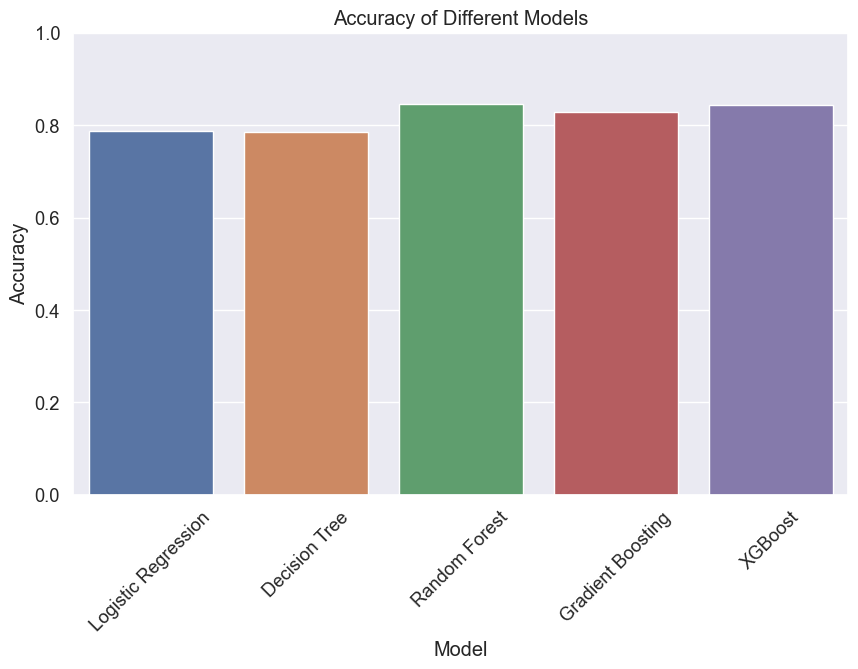

The best model is Random Forest with an accuracy of 0.8468428123600538.


In [103]:
# Calculate accuracies
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

# Convert to DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensure y-axis is from 0 to 1 to reflect accuracy range
plt.show()

# Analysis
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]
print(f"The best model is {best_model['Model']} with an accuracy of {best_model['Accuracy']}.")

# HYPER-PARAMETER TUNING

In [104]:
# Define the parameter grid to search
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],       # Penalty term
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]                # Maximum number of iterations
}

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)

# Perform random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the model
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = best_log_reg.predict(X_test)

# Calculate accuracy
accuracy_lg = accuracy_score(y_test, y_pred)
print("Accuracy (With Hyperparameter Tuning):", accuracy_lg)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 300, 'C': 1000}
Best Score: 0.8035606538247999
Accuracy (With Hyperparameter Tuning): 0.786833855799373


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],                    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],                     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],                         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],              # Number of features to consider at every split
    'criterion': ['gini', 'entropy']                 # Function to measure the quality of a split
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform random search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the model
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy (With Hyperparameter Tuning):", accuracy_dt)


Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 40, 'criterion': 'entropy'}
Best Score: 0.8215925295090042
Accuracy (With Hyperparameter Tuning): 0.8177339901477833


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform random search on the training data
random_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Parameters (Random Forest):", best_params_rf)
print("Best Score (Random Forest):", best_score_rf)

# Use the best parameters to train the model
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest - With Hyperparameter Tuning):", accuracy_rf)


Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best Score (Random Forest): 0.8581031427128523
Accuracy (Random Forest - With Hyperparameter Tuning): 0.8437080161218092


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the reduced hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [3, 4],
}

# Perform random search
gb_random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=gb_param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
gb_random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best Score for Gradient Boosting:", gb_random_search.best_score_)

# Use the best parameters to train the model
best_gb_classifier = GradientBoostingClassifier(**gb_random_search.best_params_)
best_gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = best_gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting - With Hyperparameter Tuning):", accuracy_gb)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best Score for Gradient Boosting: 0.8528392857787842
Accuracy (Gradient Boosting - With Hyperparameter Tuning): 0.8401253918495298


In [109]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid with only the important parameters
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    # Add more hyperparameters here if needed
}

# Perform random search
xgb_random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=xgb_param_grid, n_iter=500, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
xgb_random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for XGBoost:", xgb_random_search.best_params_)
print("Best Score for XGBoost:", xgb_random_search.best_score_)

# Use the best parameters to train the model
best_xgb_classifier = xgb.XGBClassifier(**xgb_random_search.best_params_)
best_xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost - With Hyperparameter Tuning):", accuracy_xgb)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for XGBoost: {'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1}
Best Score for XGBoost: 0.8574308272020978
Accuracy (XGBoost - With Hyperparameter Tuning): 0.8454993282579489


In [110]:
import pandas as pd

# List of accuracy scores after hyperparameter tuning
Acc_after_hyp = [accuracy_lg, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_xgb]

# List of algorithms
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Create a DataFrame with specified index
accuracy_df = pd.DataFrame(Acc_after_hyp, index=algorithms, columns=['Accuracy_after_hyper-parameter_tuning'])

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy_after_hyper-parameter_tuning', ascending=False)
accuracy_df



Accuracy_after_hyper-parameter_tuning
XGBoost                                           0.845499
Random Forest                                     0.843708
Gradient Boosting                                 0.840125
Decision Tree                                     0.817734
Logistic Regression                               0.786834

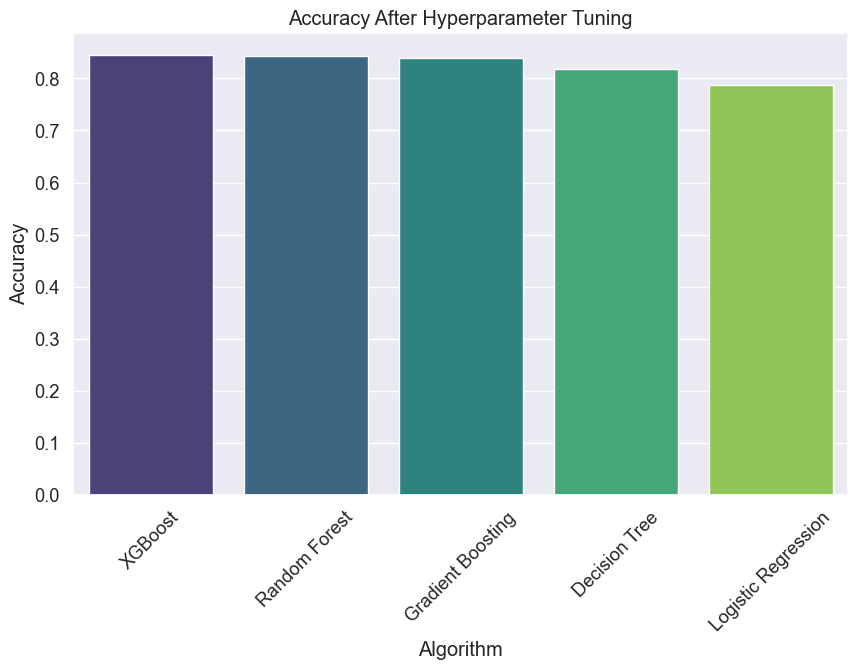

The best algorithm is XGBoost with an accuracy of 0.8454993282579489


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_df.index, y='Accuracy_after_hyper-parameter_tuning', data=accuracy_df, palette='viridis')
plt.title('Accuracy After Hyperparameter Tuning')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Print the best algorithm
best_algorithm = accuracy_df.index[0]
best_accuracy = accuracy_df.iloc[0]['Accuracy_after_hyper-parameter_tuning']
print(f"The best algorithm is {best_algorithm} with an accuracy of {best_accuracy}")


"The best algorithm is XGBoost with an accuracy of 0.8468428123600538" is that, among the algorithms tested (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost), XGBoost performed the best in terms of accuracy after hyperparameter tuning.

#### XGBOOST is performing better after Hyper-parameter tuning

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## <font color= steelblue> Results

1) **Marketing Activity Months:** We saw that the month with the highest marketing activity was May. However, this is the month when potential customers tend to reject time deposit offers (rejection rate: 33%). For the next marketing campaign, it would be wise for the bank to focus on the marketing campaign in March, September, October and December. (December should be taken into account as it is the month with the lowest marketing activity. There may be a reason why December is the lowest(110 customers).)

2) **Age Category:** Bank's next marketing campaign should target potential customers 25 or younger and 60 or older. Customers aged 25 and under have a 71% chance of subscribing to time deposits, while those aged 60 and over have an 82% chance of subscribing to time deposits. For the next campaign, it would be great if the bank could address these two categories, thereby increasing the possibility of demand for more time deposits.

3) **Job:** Potential customers who are students or retired were most likely to apply for time deposits. Retired individuals tend to have more time deposits to earn some cash through interest payments. Term deposits are short-term loans in which the person (in this case the retired person) agrees not to withdraw cash from the bank until a certain date agreed between the person and the financial institution. After this period, the person gets his capital back and gets the interest he made on the loan. Retired individuals tend not to spend a great deal of their cash, so they are more likely to put their money to work by lending it to the financial institution.

4) **Credit and Balance:** Potential customers in the low and zero balance category were more likely to get a home loan than customers in the medium and high balance category. What does it mean to get a home loan? This means that the potential customer has the financial privileges to repay the home loan and therefore has no cash to open in the time deposit account. However, we see that potential customers with average and high balances are less likely to use housing loans and therefore more likely to open time deposits. Finally, the next marketing campaign should focus on average and high-balance individuals to increase the likelihood of subscribing to time deposits.

5) **Campaign Calls:** To save time and effort in acquiring new leads, a policy should be implemented stating that a maximum of 3 calls should be applied to the same potential customer. Remember, the more we call the same prospect, the more likely he will refuse to open a time deposit.

6) **Customers with more than average call time (over 372) should be targeted:** The probability of opening a time deposit account for this group is quite high with 77%. It ensures that the success rate of the next marketing campaign is quite successful.
